In [1]:
import pandas as pd 
import numpy as np
import glob
import os
import math
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.decomposition import FactorAnalysis
import pingouin as pg
import semopy
import statsmodels.api as sm
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector
from statsmodels.multivariate.manova import MANOVA
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from scipy.stats import f_oneway, kruskal
import seaborn as sns
from statsmodels.stats.inter_rater import fleiss_kappa

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Read CSV
tam_df = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/tam_results/tam.csv')
demographics = pd.read_csv('/home/wb1115/VSCode_projects/cdss/cdss_1/cdss_1/demographic_results/demographics_processed.csv')

In [3]:
# Merge
tam_df = pd.merge(tam_df, demographics[['user_id', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']])
# Move columns 
col = tam_df.pop('q28')
tam_df.insert(23, col.name, col)
col = tam_df.pop('q29')
tam_df.insert(24, col.name, col)
# Update column names
tam_df.columns = ['user_id',
 'user_archetype',
 'ai_attitude',
 'PU1',
 'PU2',
 'PU3',
 'PU4',
 'PU5',
 'PU6',
 'PU7',
 'PU8',
 'PEOU1',
 'PU9',
 'PEOU2',
 'SE1',
 'SE2',
 'voluntary',
 'SN1',
 'SN2',
 'prestige_image',
 'PU10',
 'PU11',
 'BC1',
 'BC2',
 'BC3',
 'clinical_workflow',
 'infrastructure',
 'intention',
 'colleagues',
 'PU12',
 'final_comments',
 'age_new',
 'sex_new',
 'medical_speciality_new',
 'grade_new',
 'ai_familiarity_new']

# Get result columns 
tam_df_results = tam_df.iloc[:,2:30]

In [86]:
# Save final comments
tam_df['final_comments'].to_csv('final_comments.csv')

In [27]:
tam_df_results

,ai_attitude,PU1,PU2,PU3,PU4,PU5,PU6,PU7,PU8,PEOU1,...,PU10,PU11,BC1,BC2,BC3,clinical_workflow,infrastructure,intention,colleagues,PU12
0,4,5,2,4,5,4,4,5,4,4,...,4,4,4,NaN,NaN,2,3,4,3,5
1,4,4,4,5,1,5,5,5,4,2,...,3,2,2,NaN,NaN,5,1,5,4,5
2,4,3,4,5,5,3,3,3,4,4,...,3,3,4,NaN,NaN,4,3,3,3,4
3,4,4,4,3,4,4,4,3,4,4,...,4,4,4,NaN,NaN,4,3,4,4,4
4,3,3,4,4,4,4,2,4,4,4,...,4,4,1,NaN,NaN,4,4,4,3,4
5,4,3,2,2,4,2,2,2,3,4,...,3,4,1,NaN,NaN,3,4,3,3,4
6,4,5,3,4,4,4,4,4,4,4,...,4,4,3,NaN,NaN,4,4,4,3,5
7,3,4,2,4,4,4,4,4,3,3,...,3,4,3,4.0,4.0,4,4,4,3,4
8,4,3,2,4,4,4,4,4,4,4,...,3,2,2,4.0,4.0,4,3,4,2,4
9,2,3,2,2,4,3,3,3,3,2,...,3,2,2,3.0,2.0,3,2,2,3,2


In [28]:
tam_df_results.columns

Index(['ai_attitude', 'PU1', 'PU2', 'PU3', 'PU4', 'PU5', 'PU6', 'PU7', 'PU8',
       'PEOU1', 'PU9', 'PEOU2', 'SE1', 'SE2', 'voluntary', 'SN1', 'SN2',
       'prestige_image', 'PU10', 'PU11', 'BC1', 'BC2', 'BC3',
       'clinical_workflow', 'infrastructure', 'intention', 'colleagues',
       'PU12'],
      dtype='object')

In [39]:
# Transform for latex table

# Step 1: Melt the DataFrame
melted_df = tam_df_results.melt(var_name='Question', value_name='Value')

# Step 2: Group by Question and Value, and count occurrences
grouped = melted_df.groupby(['Question', 'Value']).size().unstack(fill_value=0)

# Step 3: Add the missing columns (1 to 5) if they don't exist
for i in range(1, 6):
    if i not in grouped.columns:
        grouped[i] = 0

# Step 4: Calculate the percentage
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Step 5: Combine count and percentage
latex_result = grouped.astype(str) + " (" + grouped_percentage.round(0).astype(str) + "%)"

# Step 6: Reorder columns to ensure they're in the correct order
latex_result = latex_result[[1, 2, 3, 4, 5]]

# Step 7: Rename columns
latex_result.columns = ['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree']

# Step 8: Logical ordering of rows
logical_order = ['PU1', 'PU2', 'PU3', 'PU4', 'PU5', 'PU6', 'PU7', 'PU8', 'PU9','PU10', 'PU11', 'PU12',
    'PEOU1', 'PEOU2', 'SE1', 'SE2',  'SN1', 'SN2', 'BC1', 'BC2', 'BC3', 
    'voluntary', 'prestige_image', 'clinical_workflow', 'infrastructure', 'ai_attitude', 'intention', 'colleagues'
]
latex_result = latex_result.reindex(logical_order)

# Step 9: Reset index and rename
latex_result.reset_index(inplace=True)
latex_result.rename(columns={'Question': 'TAM category'}, inplace=True)

# Step 10: Add questions
question_list = [
    'I liked using the AI CDSS',
    'I prefered making IV-to-oral switch decisions with the AI CDSS versus without',
    'In my job using this AI CDSS would be relevant',
    'The data presented in this study is important for delivering care and prescribing antibiotics',
    'I would find the AI CDSS useful in my job',
    'Using this AI CDSS in my job would increase my productivity',
    'Using this AI CDSS would make it easier to do my job',
    'This AI CDSS could improve the quality of care that I deliver',
    'I prefered using this interface for antibiotic decision making over software I currently use in clinical practice',
    'The quality of the AI CDSS predictions was high',
    'Details such as similar patients and their features improved my trust in the AI CDSS',
    'Overall, I think this AI CDSS has the potential to be a useful tool for antibiotic intravenous-to-oral switch decision making',
    'The interface was pleasant with information clearly visible',
    'It was easy to understand recommendations given by the AI CDSS',
    'It was easy to get acquainted using the AI',
    'Training on the AI CDSS was sufficient',
    'Patients will welcome that I use this AI technology',
    'People who are important to me think I should use AI technology',
    'Using the AI CDSS changed my decision making',
    'I was reassured when my clinical decision aligned with the AI CDSS recommendation',
    'I investigated further when my clinical decision was different from the AI CDSS recommendation',
    'My use of the AI CDSS was voluntary',
    'People in my organization involved in AI research have more prestige than those who do not',
    'This AI CDSS could be seamlessly integrated into my current clinical workflow',
    'I think my healthcare institution has the necessary infrastructure to support this AI CDSS',
    'I feel comfortable with AI technology in healthcare',
    'Assuming I had access to the AI CDSS, I would intend to use it',
    'How many of your colleagues would use this AI CDSS if it were implemented',
]


latex_result['Question'] = question_list
col_to_move = latex_result.pop('Question')
latex_result.insert(1, 'Question', col_to_move)

In [40]:
latex_result

,TAM category,Question,Strongly disagree,Disagree,Neither agree nor disagree,Agree,Strongly agree
0,PU1,I liked using the AI CDSS,0 (0.0%),0 (0.0%),13 (31.0%),26 (62.0%),3 (7.0%)
1,PU2,I prefered making IV-to-oral switch decisions ...,0 (0.0%),13 (31.0%),11 (26.0%),16 (38.0%),2 (5.0%)
2,PU3,In my job using this AI CDSS would be relevant,0 (0.0%),3 (7.0%),7 (17.0%),24 (57.0%),8 (19.0%)
3,PU4,The data presented in this study is important ...,1 (2.0%),3 (7.0%),6 (14.0%),22 (52.0%),10 (24.0%)
4,PU5,I would find the AI CDSS useful in my job,0 (0.0%),4 (10.0%),5 (12.0%),26 (62.0%),7 (17.0%)
5,PU6,Using this AI CDSS in my job would increase my...,0 (0.0%),9 (21.0%),12 (29.0%),15 (36.0%),6 (14.0%)
6,PU7,Using this AI CDSS would make it easier to do ...,1 (2.0%),7 (17.0%),10 (24.0%),18 (43.0%),6 (14.0%)
7,PU8,This AI CDSS could improve the quality of care...,0 (0.0%),3 (7.0%),9 (21.0%),26 (62.0%),4 (10.0%)
8,PU9,I prefered using this interface for antibiotic...,1 (2.0%),10 (24.0%),16 (38.0%),13 (31.0%),2 (5.0%)
9,PU10,The quality of the AI CDSS predictions was high,0 (0.0%),3 (7.0%),22 (52.0%),17 (40.0%),0 (0.0%)


# PU

In [88]:
# PU
pu_df = tam_df_results.filter(regex='PU')
# Mean and std
pu_df.mean().mean()
pu_df.mean().std()
pu_df.std().mean()

3.591269841269842

0.3084118109246874

0.8396236489376613

In [89]:
# Corrected item-total correlation
item_total_corr = pu_df.apply(lambda x: x.corr(pu_df.drop(columns=x.name).sum(axis=1)))
print(f"Item-Total Correlations for pu_df:\n", item_total_corr)

Item-Total Correlations for pu_df:
 PU1     0.543760
PU2     0.415281
PU3     0.611226
PU4     0.296769
PU5     0.698214
PU6     0.593508
PU7     0.747966
PU8     0.640521
PU9     0.402014
PU10    0.441581
PU11    0.383088
PU12    0.463688
dtype: float64


In [22]:
rating_counts

,1,2,3,4,5
PU1,0,0,11,24,2
PU2,0,12,10,14,1
PU3,0,3,7,20,7
PU4,1,3,6,17,10
PU5,0,4,5,22,6
PU6,0,8,10,13,6
PU7,1,6,8,16,6
PU8,0,3,8,23,3
PU9,1,7,15,12,2
PU10,0,3,20,14,0


In [5]:
# Transpose the DataFrame to make each question a row
df_transposed = pu_df.transpose()

# Determine the rating categories, assuming ratings from 1 to 5
categories = range(1, 6)  # Adjust range if your ratings differ

# Initialize a DataFrame to store the counts
rating_counts = pd.DataFrame(index=df_transposed.index, columns=categories).fillna(0)

# Count the occurrences of each rating for each question
for index, row in df_transposed.iterrows():
    for rating in categories:
        rating_counts.loc[index, rating] = sum(row == rating)

# Calculate Fleiss' kappa
kappa = fleiss_kappa(rating_counts.iloc[:2])
print("Fleiss' Kappa:", kappa)

Fleiss' Kappa: 0.04177365668093206


In [21]:
fleiss_kappa(np.array([[1,1,1], [1,1,1]]) )

-0.49999999999999994

In [6]:
# Calculate bivariate correlations between all question pairs
correlation_matrix = pu_df.corr(method='spearman')  # Spearman for ordinal data

# Print correlation matrix (optional) - explore using heatmaps for better visualization
print("Bivariate Correlations (Spearman's rank):")
print(correlation_matrix)

Bivariate Correlations (Spearman's rank):
           PU1       PU2       PU3       PU4       PU5       PU6       PU7  \
PU1   1.000000  0.247347  0.340184  0.197097  0.510514  0.401166  0.398640   
PU2   0.247347  1.000000  0.457612  0.036949  0.209544  0.234412  0.310429   
PU3   0.340184  0.457612  1.000000  0.380509  0.567183  0.539943  0.570485   
PU4   0.197097  0.036949  0.380509  1.000000  0.294940  0.147274  0.263997   
PU5   0.510514  0.209544  0.567183  0.294940  1.000000  0.550565  0.565413   
PU6   0.401166  0.234412  0.539943  0.147274  0.550565  1.000000  0.732209   
PU7   0.398640  0.310429  0.570485  0.263997  0.565413  0.732209  1.000000   
PU8   0.140653  0.503100  0.349154  0.296261  0.507659  0.358318  0.500359   
PU9   0.269441  0.206064  0.012675 -0.012975  0.222901  0.401276  0.591019   
PU10  0.339485  0.283140  0.159482  0.234852  0.372754  0.044581  0.238126   
PU11  0.383796  0.179756  0.259319  0.309007  0.317915  0.142144  0.309349   
PU12  0.608278  0.2478

In [90]:
# Create df for demographic analysis
#combined_pu_df = pd.DataFrame(pu_df.mean(axis=1), columns=['pu_mean']).join(demographics[['user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']])
# Create df for demographic analysis
combined_pu_df = pd.DataFrame(pu_df.mean(axis=1), columns=['pu_mean']).join(tam_df['user_id'])
combined_pu_df = combined_pu_df.merge(demographics[['user_id', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']])


# Imputation with Mode for categorical columns
combined_pu_df['age_new'].fillna(combined_pu_df['age_new'].mode()[0], inplace=True)
combined_pu_df['sex_new'].fillna(combined_pu_df['sex_new'].mode()[0], inplace=True)
combined_pu_df['medical_speciality_new'].fillna(combined_pu_df['medical_speciality_new'].mode()[0], inplace=True)
combined_pu_df['grade_new'].fillna(combined_pu_df['grade_new'].mode()[0], inplace=True)
combined_pu_df['ai_familiarity_new'].fillna(combined_pu_df['ai_familiarity_new'].mode()[0], inplace=True)

# Drop
combined_pu_df.drop(columns='user_id', inplace=True)

In [91]:
combined_pu_df

,pu_mean,user_archetype,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
0,4.166667,a,30s,Male,Pharmacist,Other,Slightly familiar
1,3.833333,b,30s,Male,Infectious Diseases,Other,Slightly familiar
2,3.500000,a,30s,Male,Infectious Diseases,Other,Slightly familiar
3,3.833333,b,30s,Female,Infectious Diseases,Other,Not familiar
4,3.666667,a,30s,Male,Other,Consultant,Slightly familiar
5,2.833333,b,40s,Male,Other,Consultant,Moderately familiar
6,4.083333,a,40s,Male,Pharmacist,Consultant,Slightly familiar
7,3.583333,b,30s,Female,Pharmacist,Other,Moderately familiar
8,3.500000,a,30s,Female,Pharmacist,Other,Slightly familiar
9,2.750000,b,40s,Male,Microbiology,Consultant,Slightly familiar


In [92]:
# Test for normality
model = smf.ols("pu_mean ~ user_archetype + age_new + sex_new + medical_speciality_new + grade_new + ai_familiarity_new", data=combined_pu_df).fit()
shapiro_stat, shapiro_p_value = stats.shapiro(model.resid)
print(f"Shapiro test: W-statistic={shapiro_stat}, p-value={shapiro_p_value}")
stats.normaltest(model.resid)
stats.kstest(model.resid, 'norm')

# Test for vairance
# Levene's Test for user_archetype
levene_archetype_stat, levene_archetype_p_value = stats.levene(combined_pu_df['pu_mean'][combined_pu_df['user_archetype'] == 'a'],
                       combined_pu_df['pu_mean'][combined_pu_df['user_archetype'] == 'b'])
print(f"Levene's test for user_archetype: W-statistic={levene_archetype_stat}, p-value={levene_archetype_p_value}")
# Levene's Test for age_new
unique_ages = combined_pu_df['age_new'].unique()
grouped_ages = [combined_pu_df['pu_mean'][combined_pu_df['age_new'] == age] for age in unique_ages]
levene_age_stat, levene_age_p_value = stats.levene(*grouped_ages)
print(f"Levene's test for age_new: W-statistic={levene_age_stat}, p-value={levene_age_p_value}")
# Levene's Test for sex_new
levene_sex_stat, levene_sex_p_value = stats.levene(combined_pu_df['pu_mean'][combined_pu_df['sex_new'] == 'Male'],
                       combined_pu_df['pu_mean'][combined_pu_df['sex_new'] == 'Female'])
print(f"Levene's test for sex_new: W-statistic={levene_sex_stat}, p-value={levene_sex_p_value}")
# Levene's Test for medical_speciality_new
unique_medical_specialities = combined_pu_df['medical_speciality_new'].unique()
grouped_medical_specialities = [combined_pu_df['pu_mean'][combined_pu_df['medical_speciality_new'] == speciality] for speciality in unique_medical_specialities]
levene_speciality_stat, levene_speciality_p_value = stats.levene(*grouped_medical_specialities)
print(f"Levene's test for medical_speciality_new: W-statistic={levene_speciality_stat}, p-value={levene_speciality_p_value}")
# Levene's Test for grade_new
unique_grades = combined_pu_df['grade_new'].unique()
grouped_grades = [combined_pu_df['pu_mean'][combined_pu_df['grade_new'] == grade] for grade in unique_grades]
levene_grade_stat, levene_grade_p_value = stats.levene(*grouped_grades)
print(f"Levene's test for grade_new: W-statistic={levene_grade_stat}, p-value={levene_grade_p_value}")
# Levene's Test for ai_familiarity_new
unique_ais = combined_pu_df['ai_familiarity_new'].unique()
grouped_ais = [combined_pu_df['pu_mean'][combined_pu_df['ai_familiarity_new'] == ai] for ai in unique_ais]
levene_ai_stat, levene_ai_p_value = stats.levene(*grouped_ais)
print(f"Levene's test for ai_familiarity_new: W-statistic={levene_ai_stat}, p-value={levene_ai_p_value}")

if shapiro_p_value >= 0.05 and levene_archetype_p_value >=0.05 and levene_age_p_value >=0.05 and levene_sex_p_value >= 0.05 and levene_speciality_p_value >=0.05 and levene_grade_p_value >= 0.05 and levene_ai_p_value >= 0.05:
    anova_bool = True
else:
    anova_bool = False

print('\n')
print('anova_bool:', anova_bool)
print('\n')

# Perform the appropriate test
# Do anover independantly for each variable and collectivly 
if anova_bool:
    print('Collective')
    model = ols("pu_mean ~ user_archetype + age_new + sex_new + medical_speciality_new + grade_new + ai_familiarity_new", data=combined_pu_df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    # Interpretation
    for index, row in aov_table.iterrows():
        sum_sq, df_value, f_value, pr_f = row
        print(f"ANOVA for {index}: Statistic={f_value:.4f}, p-value={pr_f:.4f}")
        if pr_f < 0.05:
            print(f"  -> The differences in {index} are statistically significant.\n")
        else:
            print(f"  -> The differences in {index} are not statistically significant.\n")

# Function to perform ANOVA
def perform_anova(df, group_var):
    groups = df.groupby(group_var)['pu_mean'].apply(list)
    stat, p_value = f_oneway(*groups)
    return stat, p_value

# Function to perform Kruskal-Wallis H test
def perform_kruskal(df, group_var):
    groups = df.groupby(group_var)['pu_mean'].apply(list)
    stat, p_value = kruskal(*groups)
    return stat, p_value

print('\nIndependant')
independent_vars = ['user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
results = {}
for var in independent_vars:
    if anova_bool:
        stat, p_value = perform_anova(combined_pu_df, var)
        test_name = 'ANOVA'
    else:
        stat, p_value = perform_kruskal(combined_pu_df, var)
        test_name = 'Kruskal-Wallis'
    results[var] = {'test': test_name, 'statistic': stat, 'p_value': p_value}

# Print the results
for var, result in results.items():
    print(f"{result['test']} for {var}: Statistic={result['statistic']:.4f}, p-value={result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print(f"  -> The differences in {var} are statistically significant.\n")
    else:
        print(f"  -> The differences in {var} are ***not*** statistically significant.\n")

Shapiro test: W-statistic=0.979802131652832, p-value=0.6538659930229187


NormaltestResult(statistic=0.8963815130978205, pvalue=0.6387828204028199)

KstestResult(statistic=0.26825926473016093, pvalue=0.0036926962811758557, statistic_location=0.5473510511515651, statistic_sign=1)

Levene's test for user_archetype: W-statistic=0.21001615508885244, p-value=0.6492348776186228
Levene's test for age_new: W-statistic=1.5244090441932163, p-value=0.21515260230169475
Levene's test for sex_new: W-statistic=0.13491117937117317, p-value=0.715329567221149
Levene's test for medical_speciality_new: W-statistic=0.014244541538385998, p-value=0.9976373433401675
Levene's test for grade_new: W-statistic=4.633078501366475, p-value=0.037448863612564
Levene's test for ai_familiarity_new: W-statistic=0.3797922690719715, p-value=0.7681011578934195


anova_bool: False



Independant
Kruskal-Wallis for user_archetype: Statistic=0.0002, p-value=0.9899
  -> The differences in user_archetype are ***not*** statistically significant.

Kruskal-Wallis for age_new: Statistic=5.4021, p-value=0.2485
  -> The differences in age_new are ***not*** statistically significant.

Kruskal-Wallis for sex_new: Statistic=1.0029, p-value=0.3166
  -> The differences in sex_new are ***not*** statistically signifi

Text(0.5, 1.0, 'Probability plot of regression residuals \n with R value')

<bound method Axes.set of <Axes: title={'center': 'Probability plot of regression residuals \n with R value'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>>

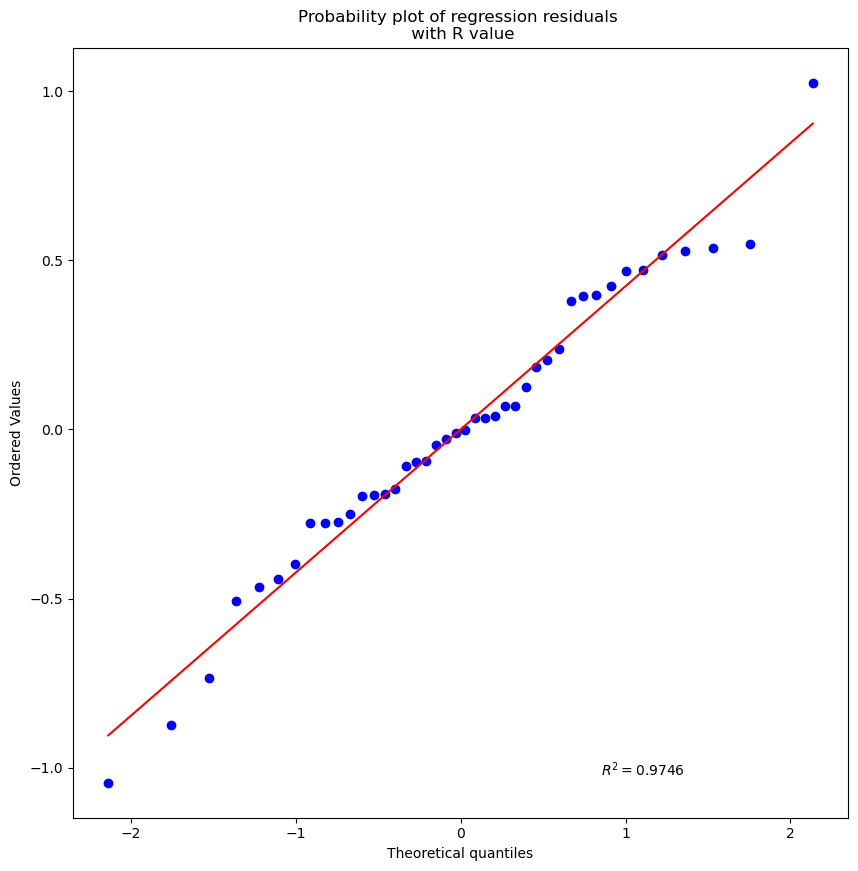

In [93]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of regression residuals \n with R value")
ax.set

plt.show()

In [94]:
def plot_boxplot_with_mean_median(df, cat_col, cont_col):
    plt.figure(figsize=(10, 6))
    box_plot = sns.boxplot(
        x=cat_col, y=cont_col, data=df, showmeans=True,
        boxprops=dict(facecolor="lightblue", color="lightblue"),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        flierprops=dict(markerfacecolor="black", markeredgecolor="black"),
        medianprops={"color": "darkblue", "linewidth": 2},
        meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
    )

    # Add legend
    handles = [
        plt.Line2D([0], [0], color='darkblue', lw=2, label='Median'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Mean')
    ]
    box_plot.legend(handles=handles, loc='lower right')

    plt.xlabel(cat_col.replace('_', ' ').title())
    plt.ylabel(cont_col.replace('_', ' ').title())
    plt.title(f'Box Plot of {cont_col.replace("_", " ").title()} by {cat_col.replace("_", " ").title()}')
    plt.xticks(rotation=45)
    plt.ylim(1, 5)
    plt.show()

/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


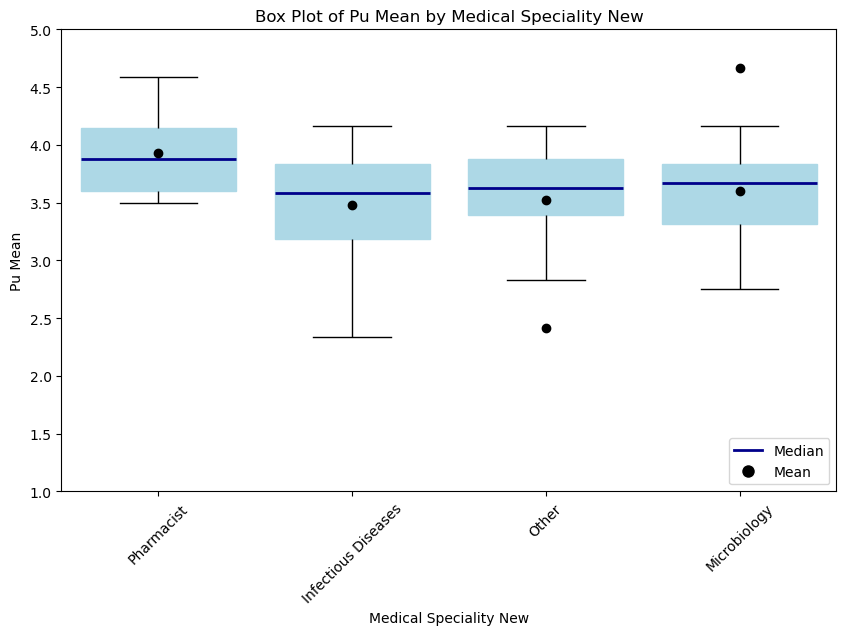

In [95]:
plot_boxplot_with_mean_median(combined_pu_df, 'medical_speciality_new', 'pu_mean')

/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


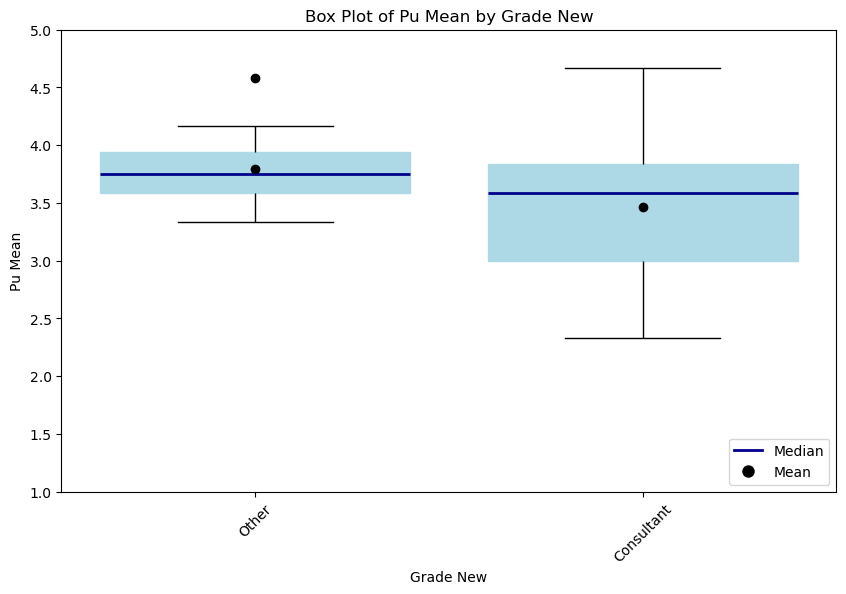

In [96]:
plot_boxplot_with_mean_median(combined_pu_df, 'grade_new', 'pu_mean')

/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


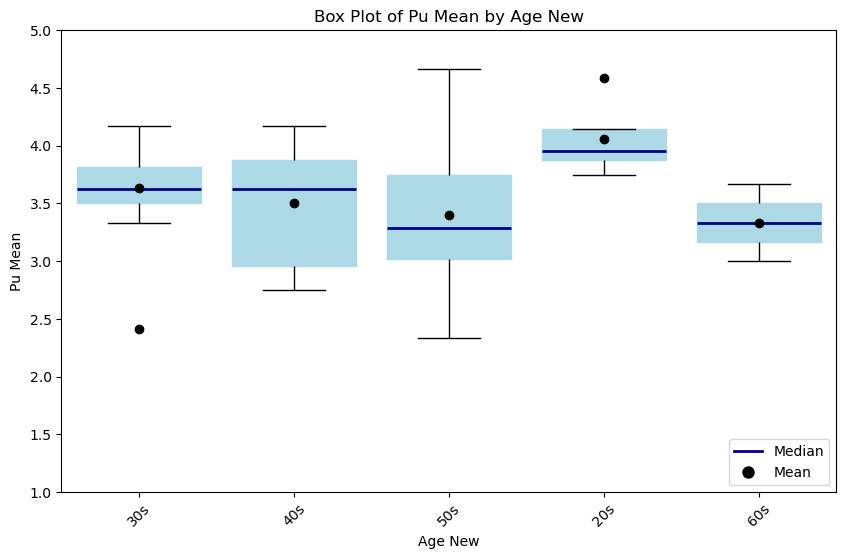

In [97]:
plot_boxplot_with_mean_median(combined_pu_df, 'age_new', 'pu_mean')

/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


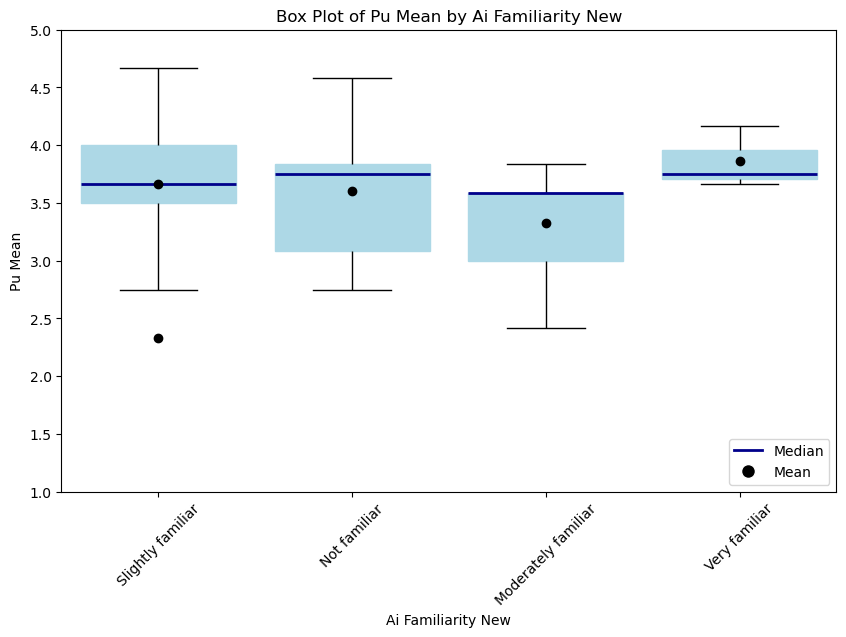

In [98]:
plot_boxplot_with_mean_median(combined_pu_df, 'ai_familiarity_new', 'pu_mean')

# Functions

In [8]:
def anover_kw_test(df, column):
    # Test for normality
    model = smf.ols(f"{column} ~ user_archetype + age_new + sex_new + medical_speciality_new + grade_new + ai_familiarity_new", data=df).fit()
    shapiro_stat, shapiro_p_value = stats.shapiro(model.resid)
    print(f"Shapiro test: W-statistic={shapiro_stat}, p-value={shapiro_p_value}")
    stats.normaltest(model.resid)
    stats.kstest(model.resid, 'norm')

    # Test for vairance
    # Levene's Test for user_archetype
    levene_archetype_stat, levene_archetype_p_value = stats.levene(df[column][df['user_archetype'] == 'a'],
                        df[column][df['user_archetype'] == 'b'])
    print(f"Levene's test for user_archetype: W-statistic={levene_archetype_stat}, p-value={levene_archetype_p_value}")
    # Levene's Test for age_new
    unique_ages = df['age_new'].unique()
    grouped_ages = [df[column][df['age_new'] == age] for age in unique_ages]
    levene_age_stat, levene_age_p_value = stats.levene(*grouped_ages)
    print(f"Levene's test for age_new: W-statistic={levene_age_stat}, p-value={levene_age_p_value}")
    # Levene's Test for sex_new
    levene_sex_stat, levene_sex_p_value = stats.levene(df[column][df['sex_new'] == 'Male'],
                        df[column][df['sex_new'] == 'Female'])
    print(f"Levene's test for sex_new: W-statistic={levene_sex_stat}, p-value={levene_sex_p_value}")
    # Levene's Test for medical_speciality_new
    unique_medical_specialities = df['medical_speciality_new'].unique()
    grouped_medical_specialities = [df[column][df['medical_speciality_new'] == speciality] for speciality in unique_medical_specialities]
    levene_speciality_stat, levene_speciality_p_value = stats.levene(*grouped_medical_specialities)
    print(f"Levene's test for medical_speciality_new: W-statistic={levene_speciality_stat}, p-value={levene_speciality_p_value}")
    # Levene's Test for grade_new
    unique_grades = df['grade_new'].unique()
    grouped_grades = [df[column][df['grade_new'] == grade] for grade in unique_grades]
    levene_grade_stat, levene_grade_p_value = stats.levene(*grouped_grades)
    print(f"Levene's test for grade_new: W-statistic={levene_grade_stat}, p-value={levene_grade_p_value}")
    # Levene's Test for ai_familiarity_new
    unique_ais = df['ai_familiarity_new'].unique()
    grouped_ais = [df[column][df['ai_familiarity_new'] == ai] for ai in unique_ais]
    levene_ai_stat, levene_ai_p_value = stats.levene(*grouped_ais)
    print(f"Levene's test for ai_familiarity_new: W-statistic={levene_ai_stat}, p-value={levene_ai_p_value}")

    if shapiro_p_value >= 0.05 and levene_archetype_p_value >=0.05 and levene_age_p_value >=0.05 and levene_sex_p_value >= 0.05 and levene_speciality_p_value >=0.05 and levene_grade_p_value >= 0.05 and levene_ai_p_value >= 0.05:
        anova_bool = True
    else:
        anova_bool = False

    print('\n')
    print('anova_bool:', anova_bool)
    print('\n')

    # Perform the appropriate test
    # Do anover independantly for each variable and collectivly 
    if anova_bool:
        print('Collective')
        model = ols(f"{column} ~ user_archetype + age_new + sex_new + medical_speciality_new + grade_new + ai_familiarity_new", data=df).fit()
        aov_table = sm.stats.anova_lm(model, typ=2)
        # Interpretation
        for index, row in aov_table.iterrows():
            sum_sq, df_value, f_value, pr_f = row
            if pr_f < 0.05:
                print(f"ANOVA for {index}: Statistic={f_value:.4f}, p-value={pr_f:.4f}")
                print(f"  -> The differences in {index} are statistically significant.\n")
            #else:
            #    print(f"  -> The differences in {index} are ***NOT*** statistically significant.\n")

    # Function to perform ANOVA
    def perform_anova(df, group_var):
        groups = df.groupby(group_var)[column].apply(list)
        stat, p_value = f_oneway(*groups)
        return stat, p_value

    # Function to perform Kruskal-Wallis H test
    def perform_kruskal(df, group_var):
        groups = df.groupby(group_var)[column].apply(list)
        stat, p_value = kruskal(*groups)
        return stat, p_value

    print('\nIndependant')
    independent_vars = ['user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']
    results = {}
    for var in independent_vars:
        if anova_bool:
            stat, p_value = perform_anova(df, var)
            test_name = 'ANOVA'
        else:
            stat, p_value = perform_kruskal(df, var)
            test_name = 'Kruskal-Wallis'
        results[var] = {'test': test_name, 'statistic': stat, 'p_value': p_value}

    # Print the results
    for var, result in results.items():
        if result['p_value'] < 0.05:
            print(f"{result['test']} for {var}: Statistic={result['statistic']:.4f}, p-value={result['p_value']:.4f}")
            print(f"  -> The differences in {var} are statistically significant.\n")
        #else:
        #    print(f"  -> The differences in {var} are ***NOT*** statistically significant.\n")

In [9]:
def bar_plot(df, cat_col, question='TBC'):
    # Define the mapping of numbers to labels
    labels = {1: 'Strongly disagree', 2: 'Disagree', 3: 'Neither agree nor disagree', 4: 'Agree', 5: 'Strongly agree'}

    # Map the data to the labels
    data_labels = df[cat_col].map(labels)

    # Count the occurrences of each label and convert to percentages
    label_counts = data_labels.value_counts(normalize=True).reindex(labels.values(), fill_value=0) * 100

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    bars = label_counts.plot(kind='bar', color='skyblue')
    plt.ylabel('Percentage of respondents')
    if question != 'TBC':
        plt.title(question)
    plt.xticks(rotation=45)
    plt.ylim(0, 100)  # Set the y-axis limit to 0-100%

    # Annotate bars with percentage values
    for bar in bars.patches:
        height = bar.get_height()
        plt.annotate(f'{height:.0f}%', 
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords='offset points',
                     ha='center', va='bottom')

    plt.show()

In [10]:
def bar_plot_difference(df, cat_col, color_col, question='TBC'):
    # Define the mapping of numbers to labels
    labels = {1: 'Strongly disagree', 2: 'Disagree', 3: 'Neither agree nor disagree', 4: 'Agree', 5: 'Strongly agree'}
    
    # Map the data to the labels
    df['label'] = df[cat_col].map(labels)
    
    # Calculate total counts for overall percentage annotation
    total_counts = df['label'].value_counts(normalize=True).reindex(labels.values(), fill_value=0) * 100
    
    # Initialize an empty DataFrame for stacking
    stacked_data = pd.DataFrame(index=labels.values())

    # Populate the stacked_data DataFrame
    for category in df[color_col].unique():
        subset = df[df[color_col] == category]
        label_counts = subset['label'].value_counts().reindex(labels.values(), fill_value=0)
        stacked_data[category] = label_counts

    # Convert the stacked data into percentages of the total rows
    stacked_data = (stacked_data / len(df)) * 100

    # Define colors for the bars
    colors = ['skyblue', 'cornflowerblue', 'lightcoral', 'olivedrab', 'slategrey']

    # Plot the stacked bar chart
    plt.figure(figsize=(10, 6))
    bottom = None
    bar_width = 0.5  # Set the bar width to be narrower

    for i, category in enumerate(stacked_data.columns):
        bars = plt.bar(stacked_data.index, stacked_data[category], bottom=bottom, 
                       color=colors[i % len(colors)], alpha=0.7, width=bar_width, label=category)
        bottom = stacked_data[category] if bottom is None else bottom + stacked_data[category]

    # Annotate bars with individual segment percentage values
    for i, bar in enumerate(plt.gca().patches):
        height = bar.get_height()
        if height > 0:  # Only annotate if there is a visible bar
            plt.annotate(f'{height:.0f}%', 
                         xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                         xytext=(0, 0),  # Center the text on the bar
                         textcoords='offset points',
                         ha='center', va='center')

    # Annotate bars with overall percentage values
    overall_bars = plt.bar(stacked_data.index, total_counts, width=bar_width, color='none', edgecolor='none')
    for bar in overall_bars:
        height = bar.get_height()
        if height > 0:  # Only annotate if there is a visible bar
            plt.annotate(f'{height:.0f}%', 
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords='offset points',
                         ha='center', va='bottom')

    # Set labels and title
    plt.ylabel('Percentage of respondents')
    if question != 'TBC':
        plt.title(question)
    plt.xticks(rotation=45)
    plt.ylim(0, 100)  # Set the y-axis limit to 0-100%
    
    # Add legend
    plt.legend(title=color_col)
    
    plt.show()

# Example usage

In [17]:
# Create df
updated_tam_df = tam_df.copy()
# Imputation with Mode for categorical columns
updated_tam_df['age_new'].fillna(updated_tam_df['age_new'].mode()[0], inplace=True)
updated_tam_df['sex_new'].fillna(updated_tam_df['sex_new'].mode()[0], inplace=True)
updated_tam_df['medical_speciality_new'].fillna(updated_tam_df['medical_speciality_new'].mode()[0], inplace=True)
updated_tam_df['grade_new'].fillna(updated_tam_df['grade_new'].mode()[0], inplace=True)
updated_tam_df['ai_familiarity_new'].fillna(updated_tam_df['ai_familiarity_new'].mode()[0], inplace=True)

# Impute for BC
updated_tam_df['BC2'].fillna(updated_tam_df['BC2'].mode()[0], inplace=True)
updated_tam_df['BC3'].fillna(updated_tam_df['BC3'].mode()[0], inplace=True)


In [12]:
updated_tam_df.columns

Index(['user_id', 'user_archetype', 'ai_attitude', 'PU1', 'PU2', 'PU3', 'PU4',
       'PU5', 'PU6', 'PU7', 'PU8', 'PEOU1', 'PU9', 'PEOU2', 'SE1', 'SE2',
       'voluntary', 'SN1', 'SN2', 'prestige_image', 'PU10', 'PU11', 'BC1',
       'BC2', 'BC3', 'clinical_workflow', 'infrastructure', 'intention',
       'colleagues', 'PU12', 'final_comments', 'age_new', 'sex_new',
       'medical_speciality_new', 'grade_new', 'ai_familiarity_new'],
      dtype='object')

# PEOU

In [104]:
# PU
peou_df = tam_df_results.filter(regex='PEOU')
# Mean and std
peou_df.mean().mean()
peou_df.mean().std()
peou_df.std().mean()

3.8333333333333335

0.20203050891044205

0.7701480432760782

In [105]:
# Create df for demographic analysis
combined_peou_df = pd.DataFrame(peou_df.mean(axis=1), columns=['peou_mean']).join(tam_df['user_id'])
combined_peou_df = combined_peou_df.merge(demographics[['user_id', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']])


# Imputation with Mode for categorical columns
combined_peou_df['age_new'].fillna(combined_peou_df['age_new'].mode()[0], inplace=True)
combined_peou_df['sex_new'].fillna(combined_peou_df['sex_new'].mode()[0], inplace=True)
combined_peou_df['medical_speciality_new'].fillna(combined_peou_df['medical_speciality_new'].mode()[0], inplace=True)
combined_peou_df['grade_new'].fillna(combined_peou_df['grade_new'].mode()[0], inplace=True)
combined_peou_df['ai_familiarity_new'].fillna(combined_peou_df['ai_familiarity_new'].mode()[0], inplace=True)

# Drop
combined_peou_df.drop(columns='user_id', inplace=True)

In [106]:
anover_kw_test(combined_peou_df, 'peou_mean')

Shapiro test: W-statistic=0.9887504577636719, p-value=0.9485567212104797
Levene's test for user_archetype: W-statistic=0.0, p-value=1.0
Levene's test for age_new: W-statistic=0.6054354012521344, p-value=0.661179413563237
Levene's test for sex_new: W-statistic=1.8788022150651102, p-value=0.1781133450996382
Levene's test for medical_speciality_new: W-statistic=2.818312927674982, p-value=0.051893401757388866
Levene's test for grade_new: W-statistic=0.029476427992862358, p-value=0.8645492552562213
Levene's test for ai_familiarity_new: W-statistic=1.1674347158218128, p-value=0.33484425154223557


anova_bool: True


Collective

Independant


# SE

In [113]:
# SE
se_df = tam_df_results.filter(regex='SE')
# Mean and std
se_df.mean().mean()
se_df.mean().std()
se_df.std().mean()

4.059523809523809

0.05050762722761036

0.5148535103384044

In [114]:
# Create df for demographic analysis
combined_se_df = pd.DataFrame(se_df.mean(axis=1), columns=['se_mean']).join(tam_df['user_id'])
combined_se_df = combined_se_df.merge(demographics[['user_id', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']])


# Imputation with Mode for categorical columns
combined_se_df['age_new'].fillna(combined_se_df['age_new'].mode()[0], inplace=True)
combined_se_df['sex_new'].fillna(combined_se_df['sex_new'].mode()[0], inplace=True)
combined_se_df['medical_speciality_new'].fillna(combined_se_df['medical_speciality_new'].mode()[0], inplace=True)
combined_se_df['grade_new'].fillna(combined_se_df['grade_new'].mode()[0], inplace=True)
combined_se_df['ai_familiarity_new'].fillna(combined_se_df['ai_familiarity_new'].mode()[0], inplace=True)

# Drop
combined_se_df.drop(columns='user_id', inplace=True)

# Round for plot
combined_se_df['se_mean_round'] = combined_se_df['se_mean'].apply(lambda x: math.ceil(x))

In [115]:
anover_kw_test(combined_se_df, 'se_mean')

Shapiro test: W-statistic=0.9824623465538025, p-value=0.7561129331588745
Levene's test for user_archetype: W-statistic=0.05181347150259055, p-value=0.8210967333057329
Levene's test for age_new: W-statistic=1.4834250688016015, p-value=0.22699905033252307
Levene's test for sex_new: W-statistic=0.41648719789423344, p-value=0.5223799368346844
Levene's test for medical_speciality_new: W-statistic=0.357187195176022, p-value=0.7842112180086932
Levene's test for grade_new: W-statistic=0.3392041748206132, p-value=0.5635577315580845
Levene's test for ai_familiarity_new: W-statistic=1.1442577030812322, p-value=0.3436360181193074


anova_bool: True


Collective
ANOVA for ai_familiarity_new: Statistic=3.1752, p-value=0.0395
  -> The differences in ai_familiarity_new are statistically significant.


Independant


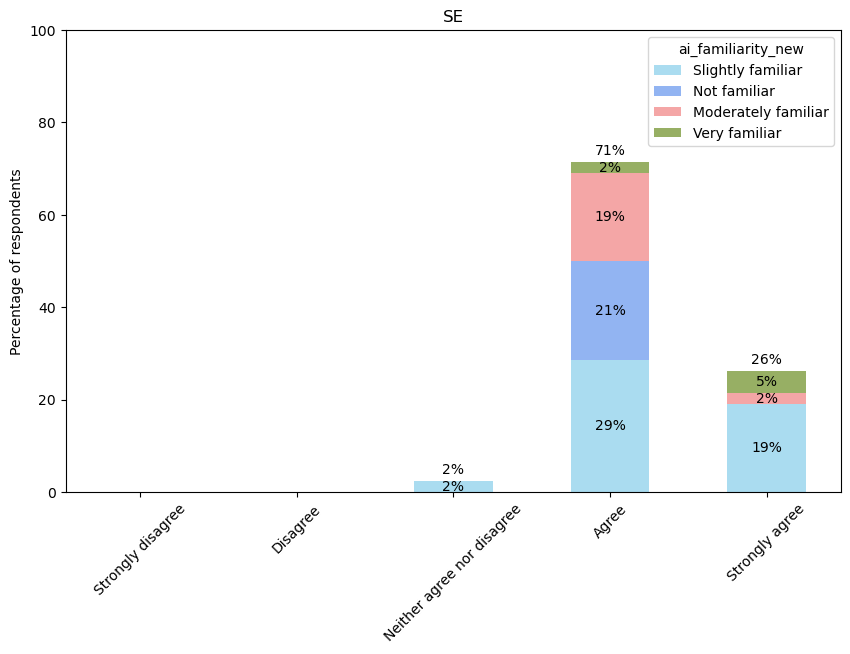

In [110]:
bar_plot_difference(combined_se_df, 'se_mean_round', 'ai_familiarity_new', 'SE')

4.023809523809524

0.4124936208284413

Shapiro test: W-statistic=0.9333074688911438, p-value=0.016776900738477707
Levene's test for user_archetype: W-statistic=0.16393442622950818, p-value=0.6877169332599878
Levene's test for age_new: W-statistic=1.7245762711864407, p-value=0.16531328872184836
Levene's test for sex_new: W-statistic=0.4629629629629629, p-value=0.5001621310441198
Levene's test for medical_speciality_new: W-statistic=1.1998808459934462, p-value=0.3228917800837817
Levene's test for grade_new: W-statistic=0.310077519379845, p-value=0.5807351144044757
Levene's test for ai_familiarity_new: W-statistic=1.1055226824457594, p-value=0.3588135827415506


anova_bool: False



Independant


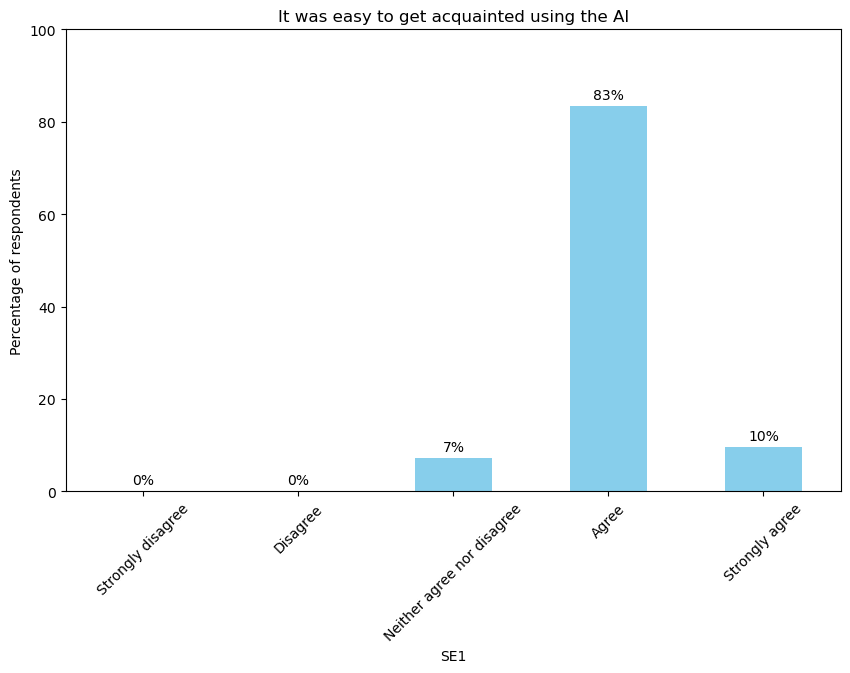

In [111]:
updated_tam_df['SE1'].mean()
updated_tam_df['SE1'].std()
anover_kw_test(updated_tam_df, 'SE1')
bar_plot(updated_tam_df, 'SE1', 'It was easy to get acquainted using the AI')

4.095238095238095

0.6172133998483675

Shapiro test: W-statistic=0.9627619385719299, p-value=0.18528586626052856
Levene's test for user_archetype: W-statistic=0.0, p-value=1.0
Levene's test for age_new: W-statistic=1.187613019891501, p-value=0.33232050680207514
Levene's test for sex_new: W-statistic=2.0435255209417433, p-value=0.16061928013433005
Levene's test for medical_speciality_new: W-statistic=0.6397306397306398, p-value=0.5941494289773199
Levene's test for grade_new: W-statistic=1.5360983102918588, p-value=0.22242231137077595
Levene's test for ai_familiarity_new: W-statistic=0.3757062146892655, p-value=0.7710071469115571


anova_bool: True


Collective

Independant


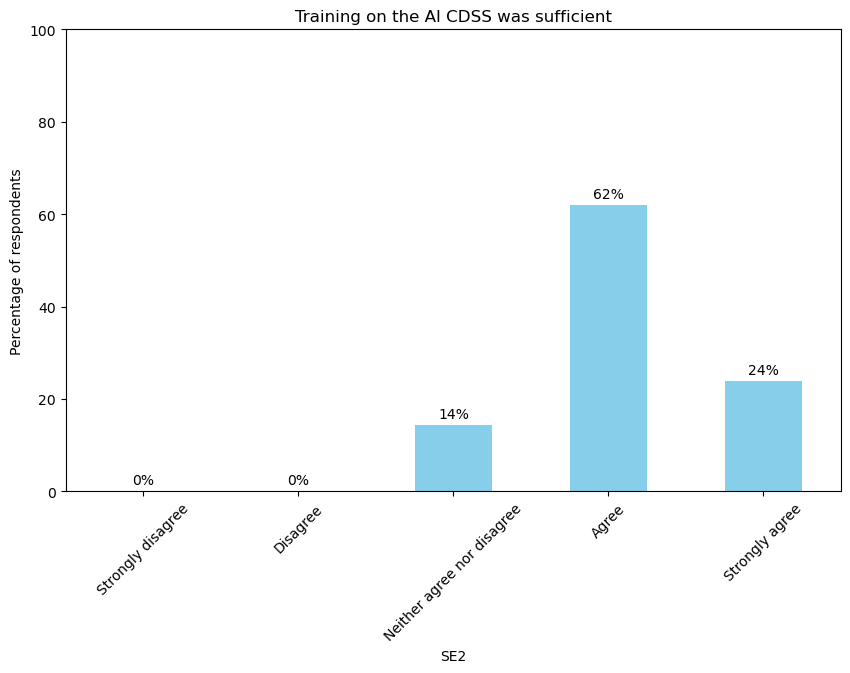

In [112]:
updated_tam_df['SE2'].mean()
updated_tam_df['SE2'].std()
anover_kw_test(updated_tam_df, 'SE2')
bar_plot(updated_tam_df, 'SE2', 'Training on the AI CDSS was sufficient')

# SN

In [113]:
# SE
sn_df = tam_df_results.filter(regex='SN')
# Mean and std
sn_df.mean().mean()
sn_df.mean().std()
sn_df.std().mean()

3.2023809523809526

0.11785113019775781

0.611865231373107

3.2857142857142856

0.55373297631551

Shapiro test: W-statistic=0.9434950947761536, p-value=0.037905555218458176
Levene's test for user_archetype: W-statistic=0.0, p-value=1.0
Levene's test for age_new: W-statistic=0.44295774647887315, p-value=0.7767437105920398
Levene's test for sex_new: W-statistic=0.15133090122956336, p-value=0.6993299634488943
Levene's test for medical_speciality_new: W-statistic=0.14262446002407775, p-value=0.9337635523567683
Levene's test for grade_new: W-statistic=0.03963198867657465, p-value=0.8432103537520464
Levene's test for ai_familiarity_new: W-statistic=0.17992424242424246, p-value=0.9093607166640145


anova_bool: False



Independant


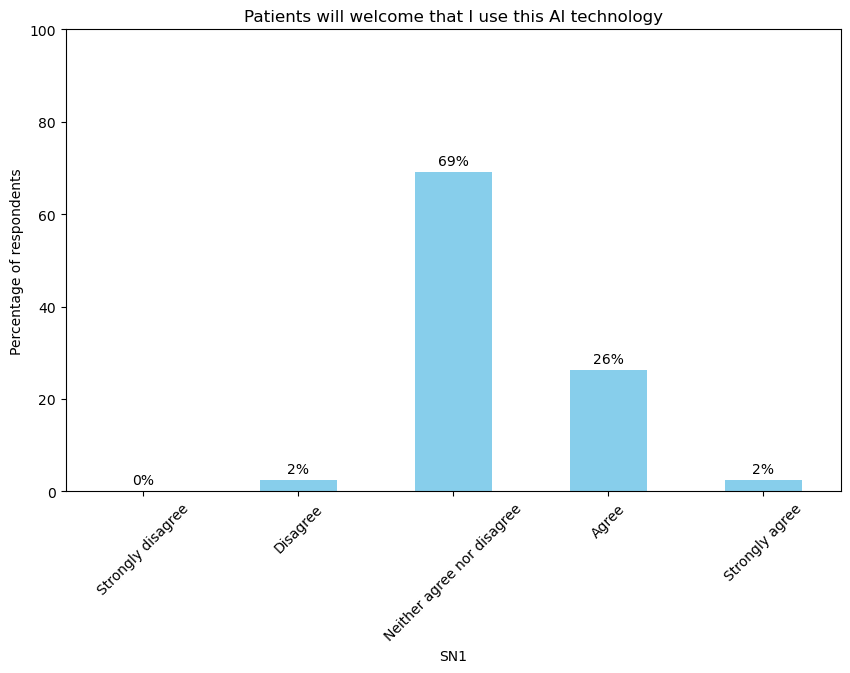

In [114]:
updated_tam_df['SN1'].mean()
updated_tam_df['SN1'].std()
anover_kw_test(updated_tam_df, 'SN1')
bar_plot(updated_tam_df, 'SN1', 'Patients will welcome that I use this AI technology')

3.119047619047619

0.669997486430704

Shapiro test: W-statistic=0.9812024831771851, p-value=0.7079579830169678
Levene's test for user_archetype: W-statistic=7.570093457943928, p-value=0.008873412710897121
Levene's test for age_new: W-statistic=1.067714285714286, p-value=0.3862633248974946
Levene's test for sex_new: W-statistic=0.9275410318686983, p-value=0.34128915081033095
Levene's test for medical_speciality_new: W-statistic=0.6781807714450201, p-value=0.5708247980209251
Levene's test for grade_new: W-statistic=0.7395863395863397, p-value=0.39491866136438314
Levene's test for ai_familiarity_new: W-statistic=0.4912280701754386, p-value=0.6904680098576489


anova_bool: False



Independant
Kruskal-Wallis for sex_new: Statistic=3.9090, p-value=0.0480
  -> The differences in sex_new are statistically significant.



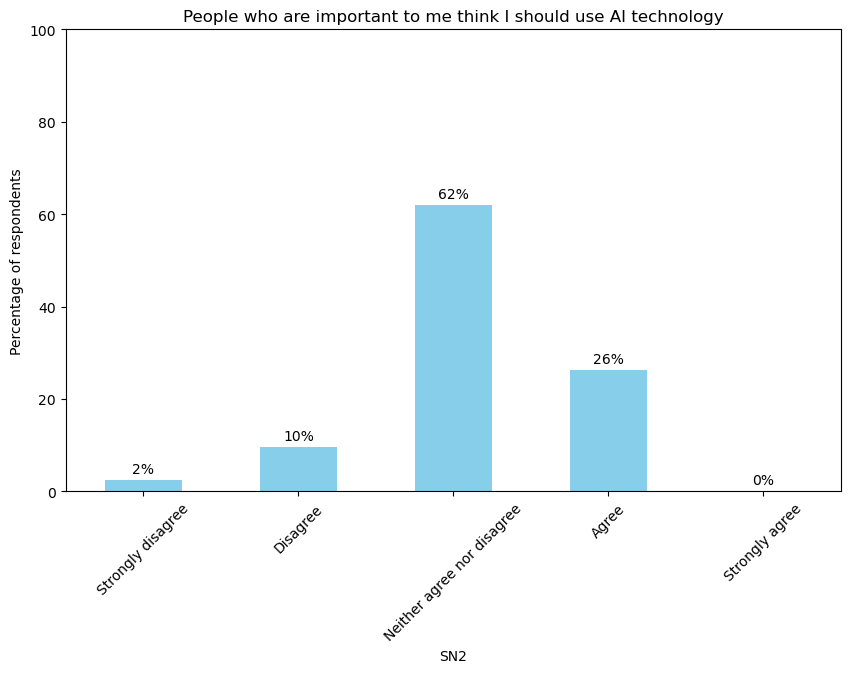

In [115]:
updated_tam_df['SN2'].mean()
updated_tam_df['SN2'].std()
anover_kw_test(updated_tam_df, 'SN2')
bar_plot(updated_tam_df, 'SN2', 'People who are important to me think I should use AI technology')

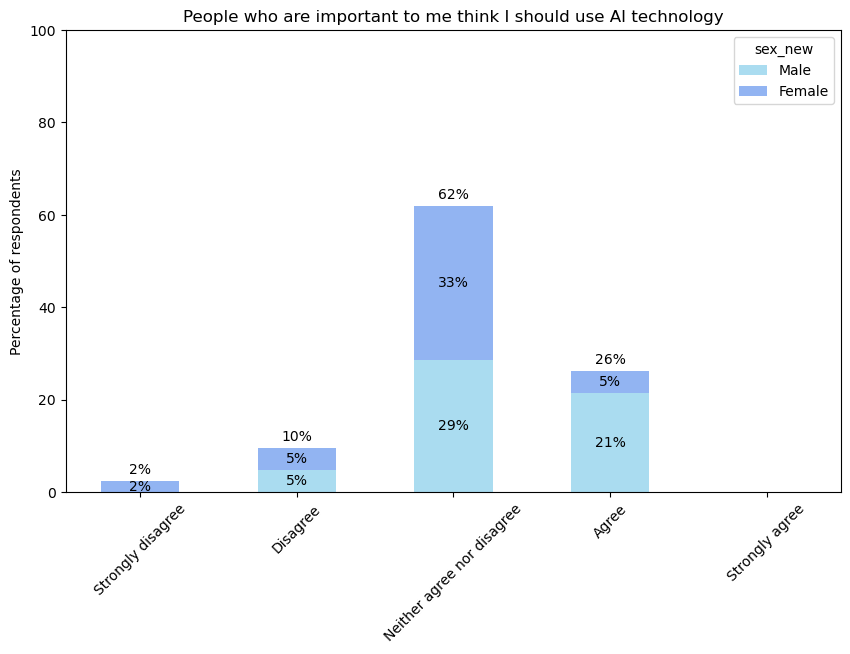

In [133]:
bar_plot_difference(updated_tam_df, 'SN2', 'sex_new', 'People who are important to me think I should use AI technology')

# BC

In [6]:
# BC
bc_df = tam_df_results.filter(regex='BC')
# Mean and std
bc_df.mean().mean()
bc_df.mean().std()
bc_df.std().mean()

3.46031746031746

0.6967585027731611

0.8835978101207845

2.6666666666666665

0.8742011452042501

Shapiro test: W-statistic=0.9728553295135498, p-value=0.4097727835178375
Levene's test for user_archetype: W-statistic=0.5113636363636358, p-value=0.47870242029987375
Levene's test for age_new: W-statistic=0.775383707201889, p-value=0.5482866844795542
Levene's test for sex_new: W-statistic=0.7982543365373993, p-value=0.3769600018613376
Levene's test for medical_speciality_new: W-statistic=0.1657779932137663, p-value=0.9187745995197552
Levene's test for grade_new: W-statistic=0.07973421926910305, p-value=0.7791139116321926
Levene's test for ai_familiarity_new: W-statistic=0.2303030303030304, p-value=0.8747079125568485


anova_bool: True


Collective
ANOVA for grade_new: Statistic=4.9670, p-value=0.0340
  -> The differences in grade_new are statistically significant.


Independant


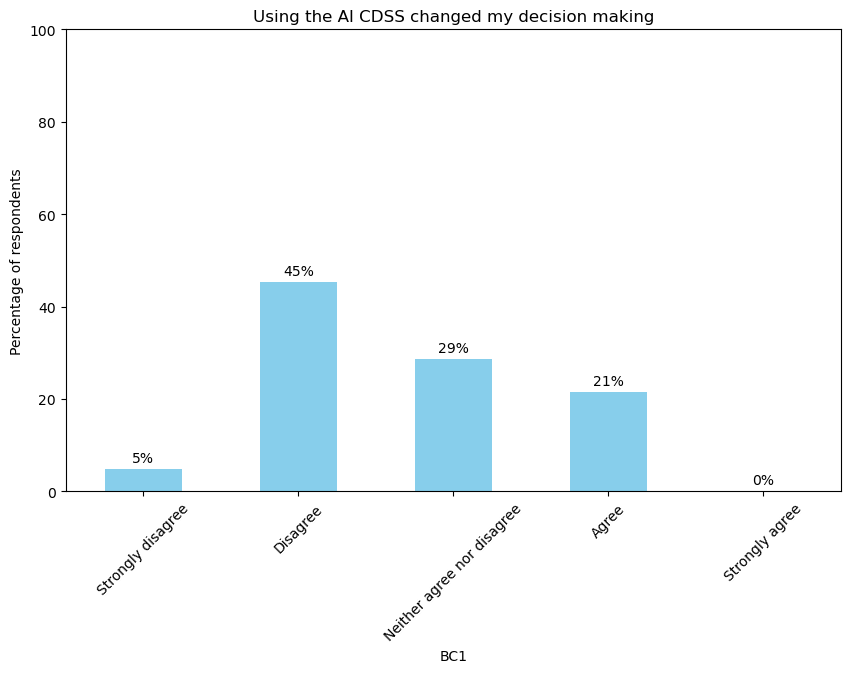

In [20]:
updated_tam_df['BC1'].mean()
updated_tam_df['BC1'].std()
anover_kw_test(updated_tam_df, 'BC1')
bar_plot(updated_tam_df, 'BC1', 'Using the AI CDSS changed my decision making')

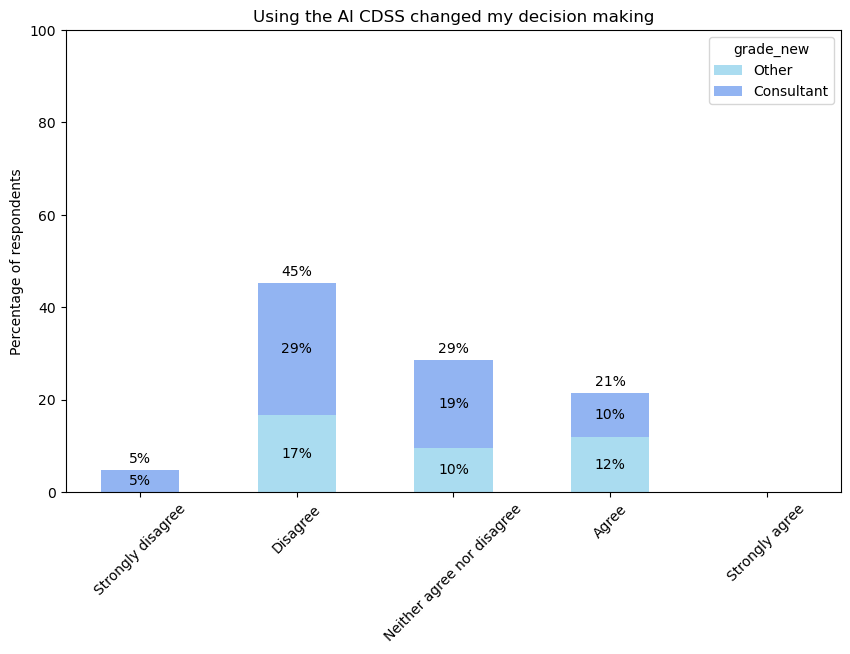

In [21]:
bar_plot_difference(updated_tam_df, 'BC1', 'grade_new', 'Using the AI CDSS changed my decision making')

In [13]:
updated_tam_df.grade_new.value_counts()

grade_new
Consultant    26
Other         16
Name: count, dtype: int64

3.9714285714285715

0.8906611650478364

Shapiro test: W-statistic=0.977787971496582, p-value=0.6860446929931641
Levene's test for user_archetype: W-statistic=nan, p-value=nan
Levene's test for age_new: W-statistic=nan, p-value=nan
Levene's test for sex_new: W-statistic=nan, p-value=nan
Levene's test for medical_speciality_new: W-statistic=nan, p-value=nan
Levene's test for grade_new: W-statistic=nan, p-value=nan
Levene's test for ai_familiarity_new: W-statistic=nan, p-value=nan


anova_bool: False



Independant


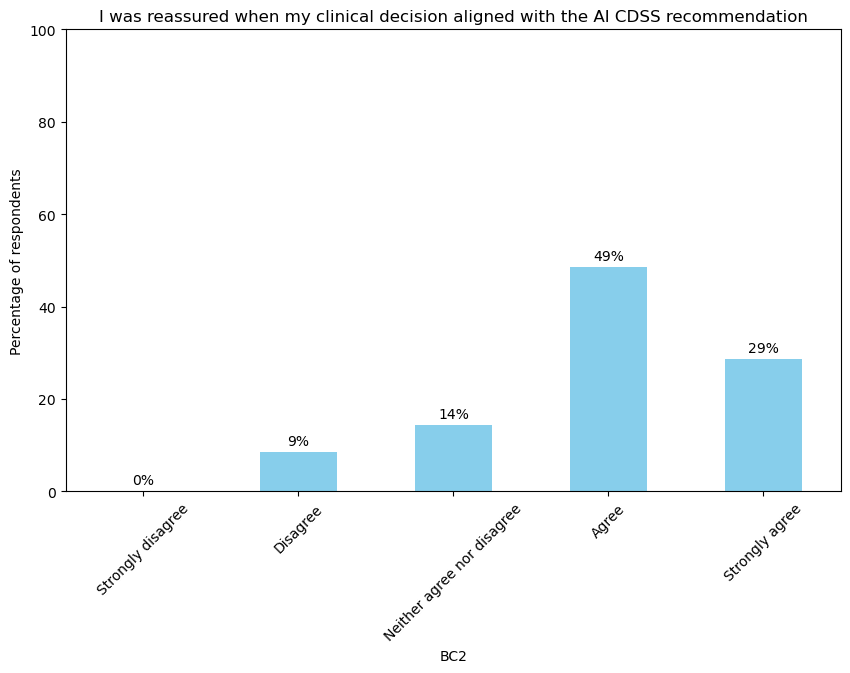

In [14]:
updated_tam_df['BC2'].mean()
updated_tam_df['BC2'].std()
anover_kw_test(updated_tam_df, 'BC2')
bar_plot(updated_tam_df, 'BC2', 'I was reassured when my clinical decision aligned with the AI CDSS recommendation')

3.742857142857143

0.8859311201102668

Shapiro test: W-statistic=0.9731138944625854, p-value=0.5342744588851929
Levene's test for user_archetype: W-statistic=nan, p-value=nan
Levene's test for age_new: W-statistic=nan, p-value=nan
Levene's test for sex_new: W-statistic=nan, p-value=nan
Levene's test for medical_speciality_new: W-statistic=nan, p-value=nan
Levene's test for grade_new: W-statistic=nan, p-value=nan
Levene's test for ai_familiarity_new: W-statistic=nan, p-value=nan


anova_bool: False



Independant


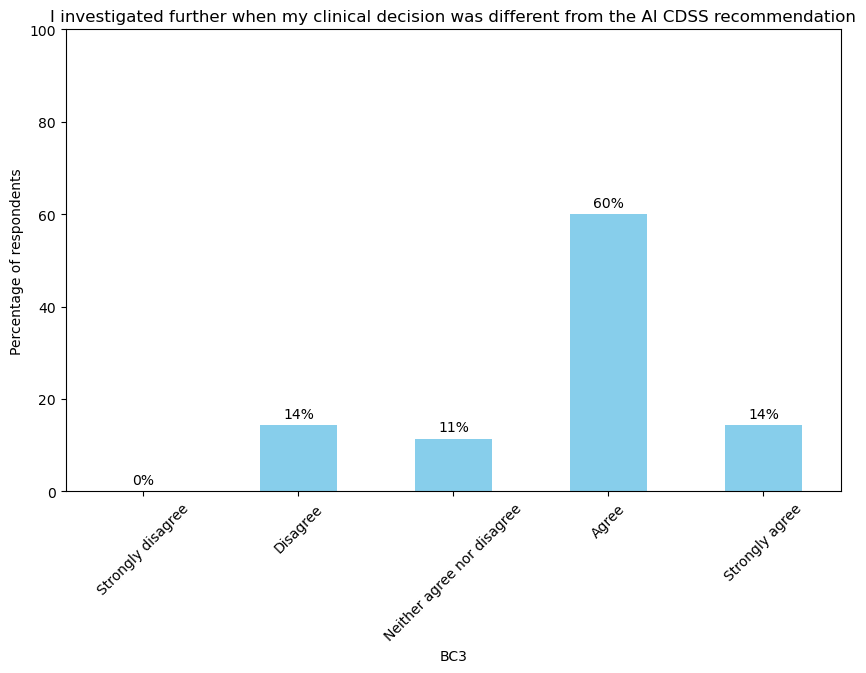

In [129]:
updated_tam_df['BC3'].mean()
updated_tam_df['BC3'].std()
anover_kw_test(updated_tam_df, 'BC3')
bar_plot(updated_tam_df, 'BC3', 'I investigated further when my clinical decision was different from the AI CDSS recommendation')

# Others

In [123]:
# ai_attitude
updated_tam_df['ai_attitude'].mean()
updated_tam_df['ai_attitude'].std()
anover_kw_test(updated_tam_df, 'ai_attitude')

3.5714285714285716

0.6678270969037458

Shapiro test: W-statistic=0.9411352276802063, p-value=0.03130989894270897
Levene's test for user_archetype: W-statistic=3.525179856115108, p-value=0.06774868270636089
Levene's test for age_new: W-statistic=0.5788075560802833, p-value=0.6798099155463716
Levene's test for sex_new: W-statistic=0.21276312814989154, p-value=0.6471087718839339
Levene's test for medical_speciality_new: W-statistic=0.36340757518560457, p-value=0.7797705011962544
Levene's test for grade_new: W-statistic=0.6529966672315425, p-value=0.42382325046693403
Levene's test for ai_familiarity_new: W-statistic=0.7620716510903428, p-value=0.5223936489829011


anova_bool: False



Independant


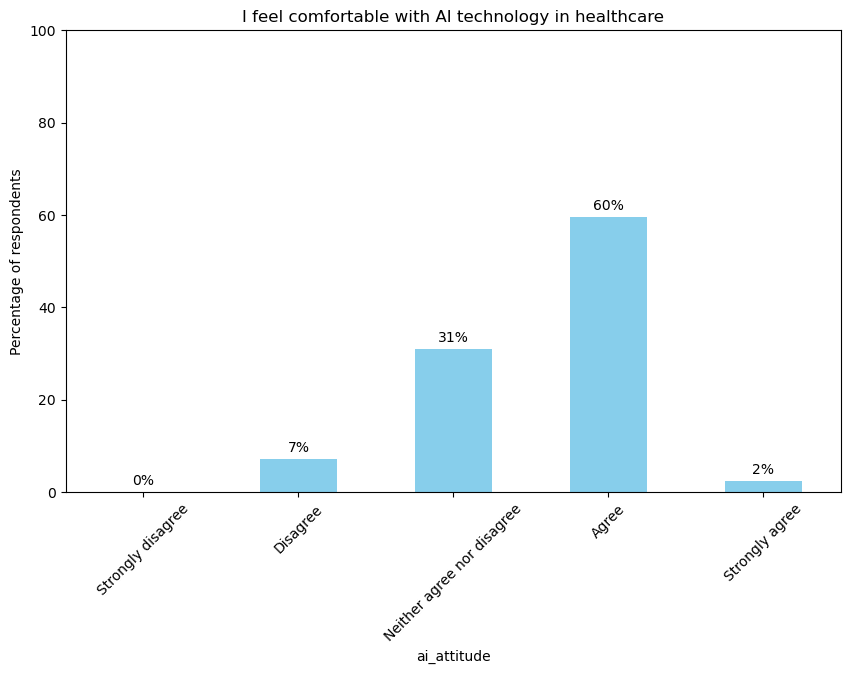

In [124]:
bar_plot(updated_tam_df, 'ai_attitude', 'I feel comfortable with AI technology in healthcare')

In [125]:
from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro, levene

# Define the mapping of numbers to labels
labels = {'Not familiar': 1, 'Slightly familiar': 2, 'Moderately familiar': 3, 'Very familiar': 4, 'Extremely familiar': 5}

# Add new column 
updated_tam_df['ai_familiarity'] = updated_tam_df.ai_familiarity_new.map(labels)

# Shapiro-Wilk Test for normality
shapiro_familiarity_stat, shapiro_familiarity_p = shapiro(updated_tam_df['ai_familiarity'])
shapiro_comfort_stat, shapiro_comfort_p = shapiro(updated_tam_df['ai_attitude'])
print(f"Shapiro-Wilk test for familiarity_with_ai: Stat={shapiro_familiarity_stat}, p-value={shapiro_familiarity_p}")
print(f"Shapiro-Wilk test for comfort_with_ai: Stat={shapiro_comfort_stat}, p-value={shapiro_comfort_p}")

# Levene's Test for homogeneity of variances
levene_stat, levene_p = levene(updated_tam_df['ai_familiarity'], updated_tam_df['ai_attitude'])
print(f"Levene's test: Stat={levene_stat}, p-value={levene_p}")

# Pearson correlation
pearson_corr, pearson_p_value = pearsonr(updated_tam_df['ai_familiarity'], updated_tam_df['ai_attitude'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p_value}")

# Spearman correlation
spearman_corr, spearman_p_value = spearmanr(updated_tam_df['ai_familiarity'], updated_tam_df['ai_attitude'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p_value}")

Shapiro-Wilk test for familiarity_with_ai: Stat=0.8526661396026611, p-value=7.28485465515405e-05
Shapiro-Wilk test for comfort_with_ai: Stat=0.7617638111114502, p-value=7.449883696608595e-07
Levene's test: Stat=0.47674418604651164, p-value=0.4918505759125368
Pearson correlation: 0.15471055359010535, p-value: 0.32793218989002637
Spearman correlation: 0.15230110823880186, p-value: 0.3356129478580824


Above ^^^ See not correlation between familiarity with AI and if comftable with AI indicating understanding AI is not driving force

4.380952380952381

0.49150743499231997

Shapiro test: W-statistic=0.9489254355430603, p-value=0.05911276862025261
Levene's test for user_archetype: W-statistic=0.0, p-value=1.0
Levene's test for age_new: W-statistic=0.12660393498716854, p-value=0.9718867991352101
Levene's test for sex_new: W-statistic=2.0435255209417433, p-value=0.16061928013433005
Levene's test for medical_speciality_new: W-statistic=1.0808383233532934, p-value=0.36880877643031035
Levene's test for grade_new: W-statistic=0.0036985668053629377, p-value=0.95180872570515
Levene's test for ai_familiarity_new: W-statistic=1.0255041518386714, p-value=0.39215526277823637


anova_bool: True


Collective

Independant


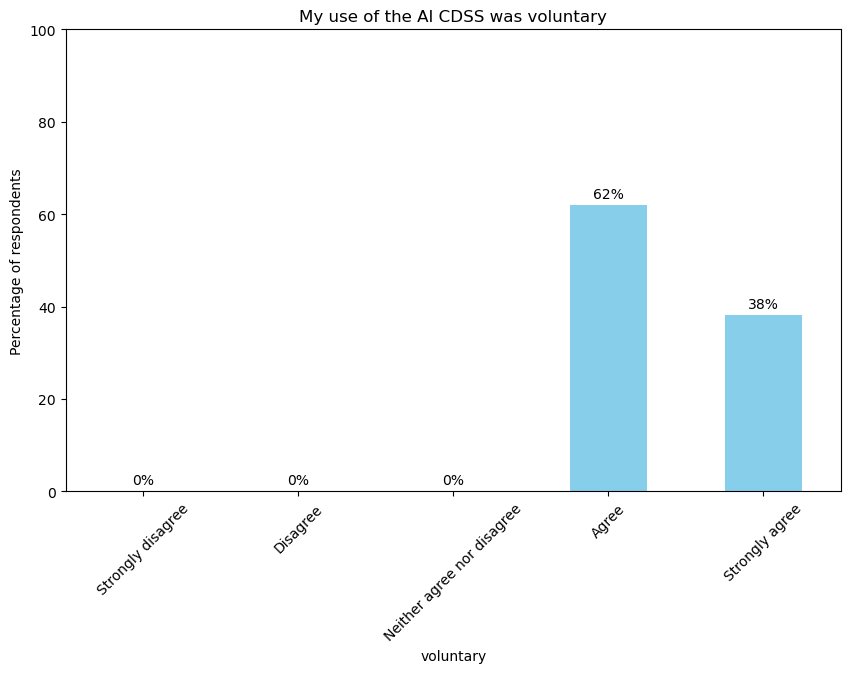

In [126]:
# voluntary
updated_tam_df['voluntary'].mean()
updated_tam_df['voluntary'].std()
anover_kw_test(updated_tam_df, 'voluntary')
bar_plot(updated_tam_df, 'voluntary', 'My use of the AI CDSS was voluntary')

3.5476190476190474

0.8611501371147363

Shapiro test: W-statistic=0.9586655497550964, p-value=0.13227993249893188
Levene's test for user_archetype: W-statistic=0.35856573705179245, p-value=0.5526801558793604
Levene's test for age_new: W-statistic=0.369431643625192, p-value=0.8288535626646942
Levene's test for sex_new: W-statistic=0.8686460237448995, p-value=0.35692209198514435
Levene's test for medical_speciality_new: W-statistic=1.5294422156076095, p-value=0.2225367619017229
Levene's test for grade_new: W-statistic=0.04599405118263635, p-value=0.8312762105425283
Levene's test for ai_familiarity_new: W-statistic=0.18179795282599015, p-value=0.9081013065164373


anova_bool: True


Collective

Independant


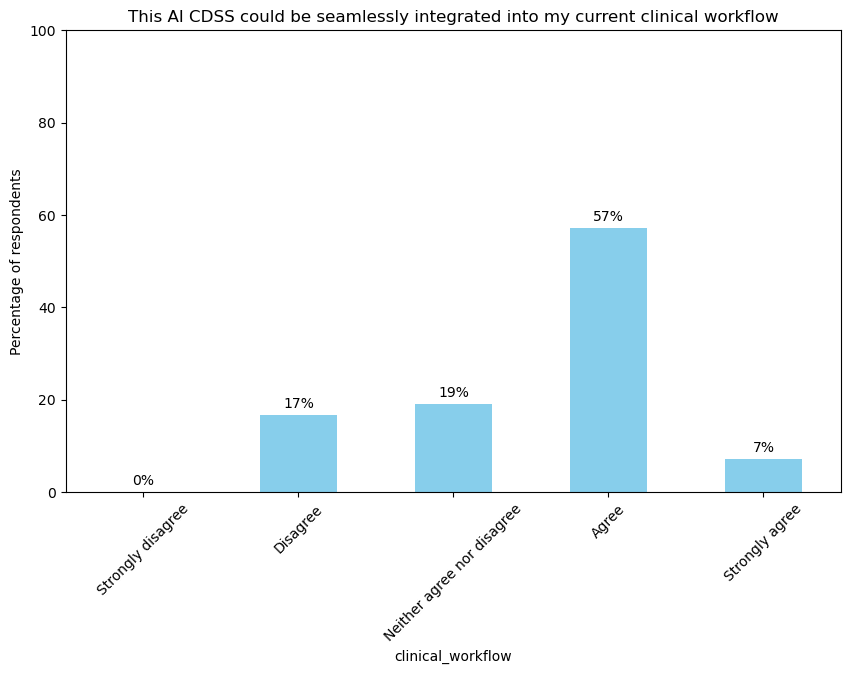

In [127]:
# clinical_workflow
updated_tam_df['clinical_workflow'].mean()
updated_tam_df['clinical_workflow'].std()
anover_kw_test(updated_tam_df, 'clinical_workflow')
bar_plot(updated_tam_df, 'clinical_workflow', 'This AI CDSS could be seamlessly integrated into my current clinical workflow')

2.7857142857142856

0.8705399021609261

Shapiro test: W-statistic=0.9791750907897949, p-value=0.6297733783721924
Levene's test for user_archetype: W-statistic=0.1923076923076923, p-value=0.6633623210790344
Levene's test for age_new: W-statistic=0.8110837438423646, p-value=0.5261826207813842
Levene's test for sex_new: W-statistic=2.5789754129557743, p-value=0.11615867122728919
Levene's test for medical_speciality_new: W-statistic=0.291913214990138, p-value=0.8309627706831495
Levene's test for grade_new: W-statistic=1.3488719884736744, p-value=0.2523592829285864
Levene's test for ai_familiarity_new: W-statistic=0.48350111856823264, p-value=0.6957260101843386


anova_bool: True


Collective

Independant


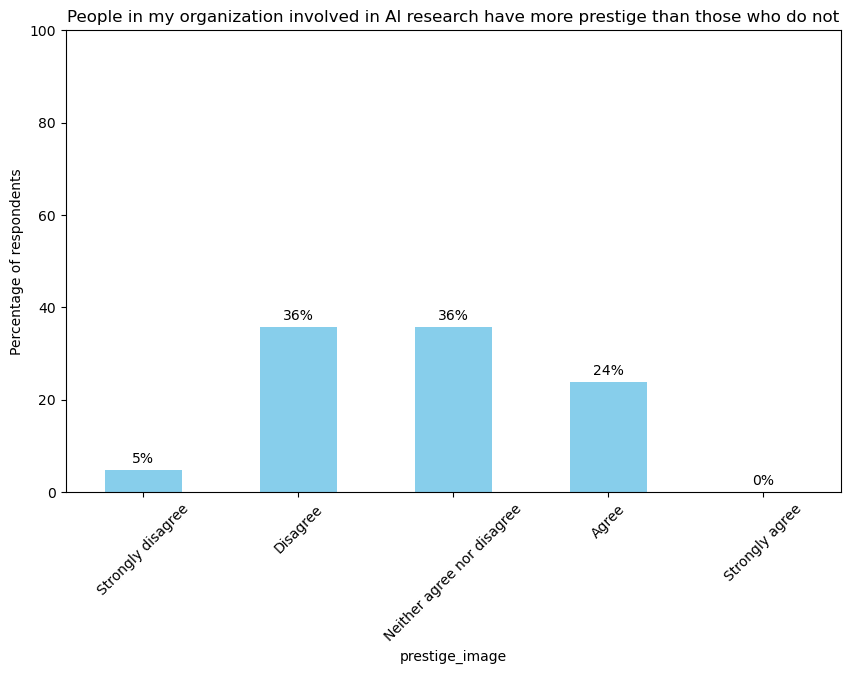

In [128]:
# prestige_image
updated_tam_df['prestige_image'].mean()
updated_tam_df['prestige_image'].std()
anover_kw_test(updated_tam_df, 'prestige_image')
bar_plot(updated_tam_df, 'prestige_image', 'People in my organization involved in AI research have more prestige than those who do not')

2.9761904761904763

0.9750070728472727

Shapiro test: W-statistic=0.9855419993400574, p-value=0.8646436333656311
Levene's test for user_archetype: W-statistic=1.5337423312883425, p-value=0.222770712932975
Levene's test for age_new: W-statistic=0.6351052048726468, p-value=0.6406704370332339
Levene's test for sex_new: W-statistic=1.0013027329674595, p-value=0.3230106907098395
Levene's test for medical_speciality_new: W-statistic=0.05570743690320539, p-value=0.9824426455752553
Levene's test for grade_new: W-statistic=0.16486259073860174, p-value=0.6868825677303383
Levene's test for ai_familiarity_new: W-statistic=0.22222222222222232, p-value=0.8803590587149526


anova_bool: True


Collective
ANOVA for sex_new: Statistic=6.4236, p-value=0.0171
  -> The differences in sex_new are statistically significant.

ANOVA for medical_speciality_new: Statistic=6.1767, p-value=0.0023
  -> The differences in medical_speciality_new are statistically significant.


Independant
ANOVA for medical_speciality_new: Statistic=3.2188, p-value=0.0333


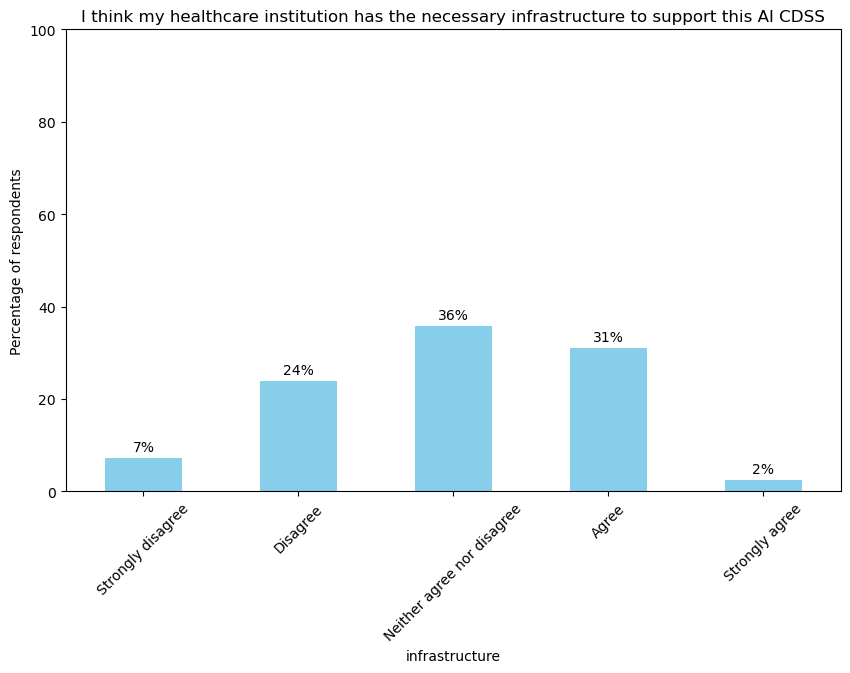

In [130]:
# infrastructure
updated_tam_df['infrastructure'].mean()
updated_tam_df['infrastructure'].std()
anover_kw_test(updated_tam_df, 'infrastructure')
bar_plot(updated_tam_df, 'infrastructure', 'I think my healthcare institution has the necessary infrastructure to support this AI CDSS')

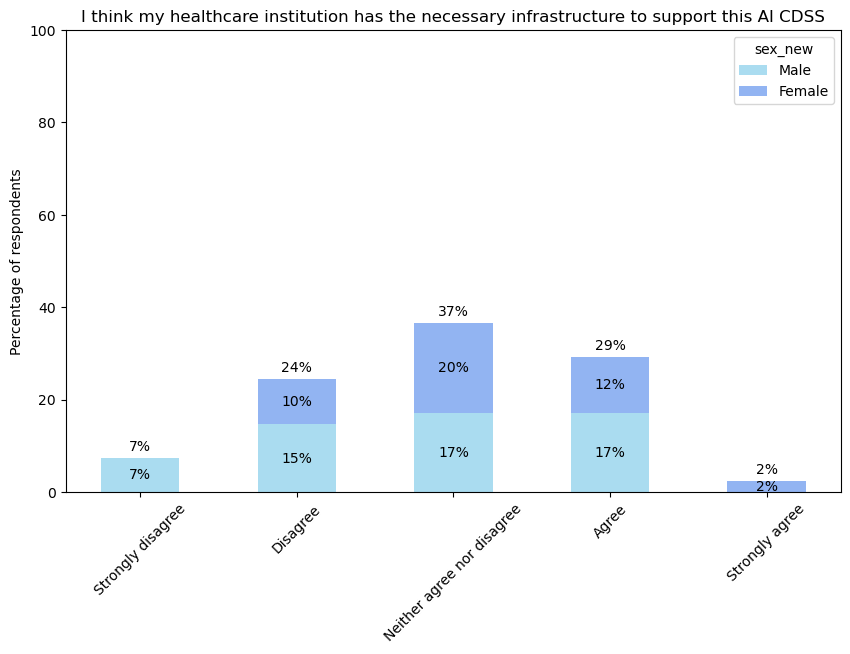

In [57]:
bar_plot_difference(updated_tam_df, 'infrastructure', 'sex_new', 'I think my healthcare institution has the necessary infrastructure to support this AI CDSS')

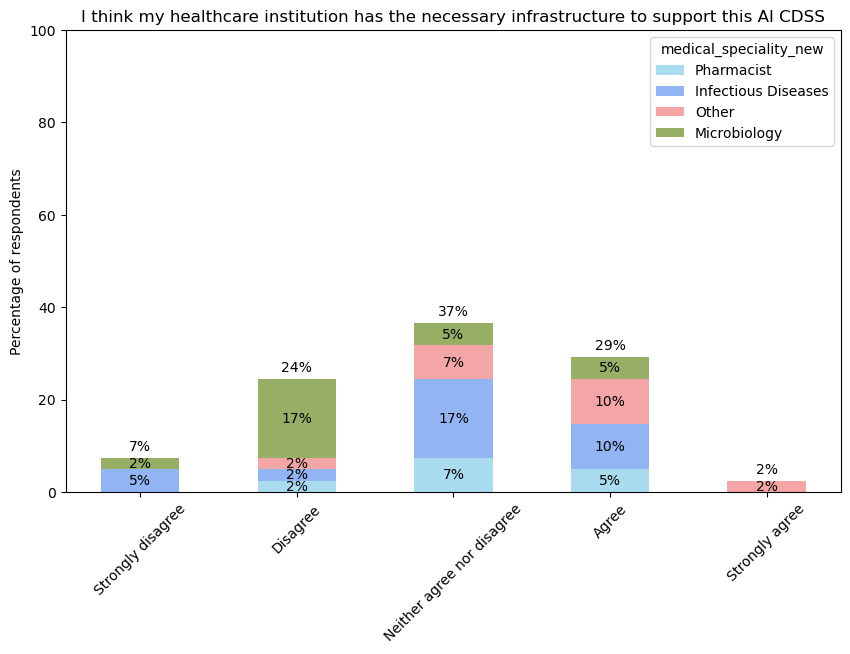

In [58]:
bar_plot_difference(updated_tam_df, 'infrastructure', 'medical_speciality_new', 'I think my healthcare institution has the necessary infrastructure to support this AI CDSS')

3.8095238095238093

0.7066960307707159

Shapiro test: W-statistic=0.9295048117637634, p-value=0.012466751970350742
Levene's test for user_archetype: W-statistic=0.2409638554216867, p-value=0.6261932547102698
Levene's test for age_new: W-statistic=0.5393586005830903, p-value=0.7077273957333681
Levene's test for sex_new: W-statistic=2.7058737473484005, p-value=0.10781654682598325
Levene's test for medical_speciality_new: W-statistic=0.26521982780579756, p-value=0.8500230285136662
Levene's test for grade_new: W-statistic=0.3069202094483849, p-value=0.5826603647940968
Levene's test for ai_familiarity_new: W-statistic=0.8354609929078013, p-value=0.48281752997969796


anova_bool: False



Independant


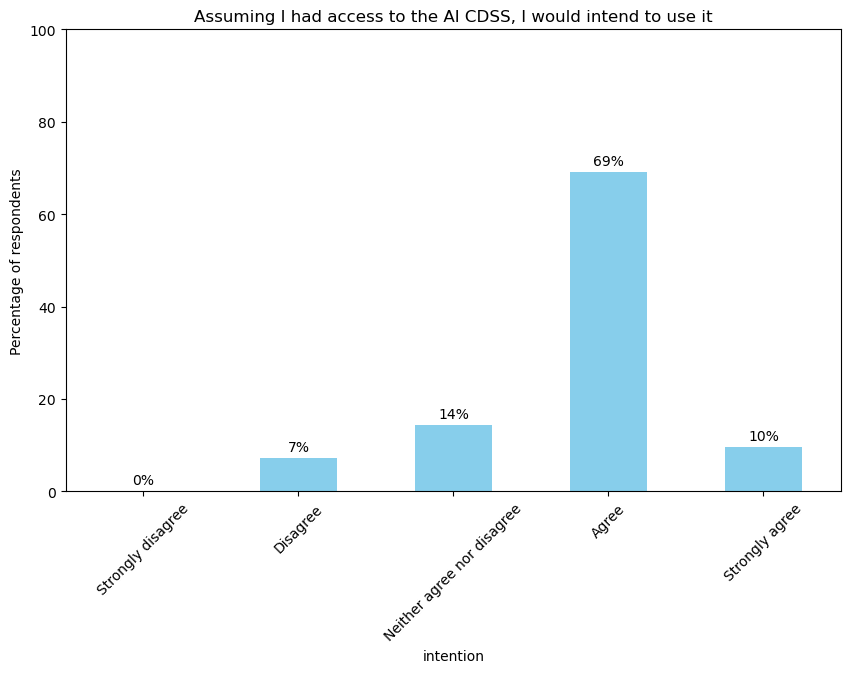

In [131]:
# intention
updated_tam_df['intention'].mean()
updated_tam_df['intention'].std()
anover_kw_test(updated_tam_df, 'intention')
bar_plot(updated_tam_df, 'intention', 'Assuming I had access to the AI CDSS, I would intend to use it')

3.0952380952380953

0.6555401351231357

Shapiro test: W-statistic=0.9799085855484009, p-value=0.6579711437225342
Levene's test for user_archetype: W-statistic=1.5384615384615392, p-value=0.22207351255239627
Levene's test for age_new: W-statistic=2.703380588876772, p-value=0.045154952884750486
Levene's test for sex_new: W-statistic=1.3320197044334974, p-value=0.2552954085713816
Levene's test for medical_speciality_new: W-statistic=0.7188519243313762, p-value=0.5469205003792021
Levene's test for grade_new: W-statistic=0.008014425966740138, p-value=0.9291127759968867
Levene's test for ai_familiarity_new: W-statistic=0.7890710382513665, p-value=0.5075311367307072


anova_bool: False



Independant


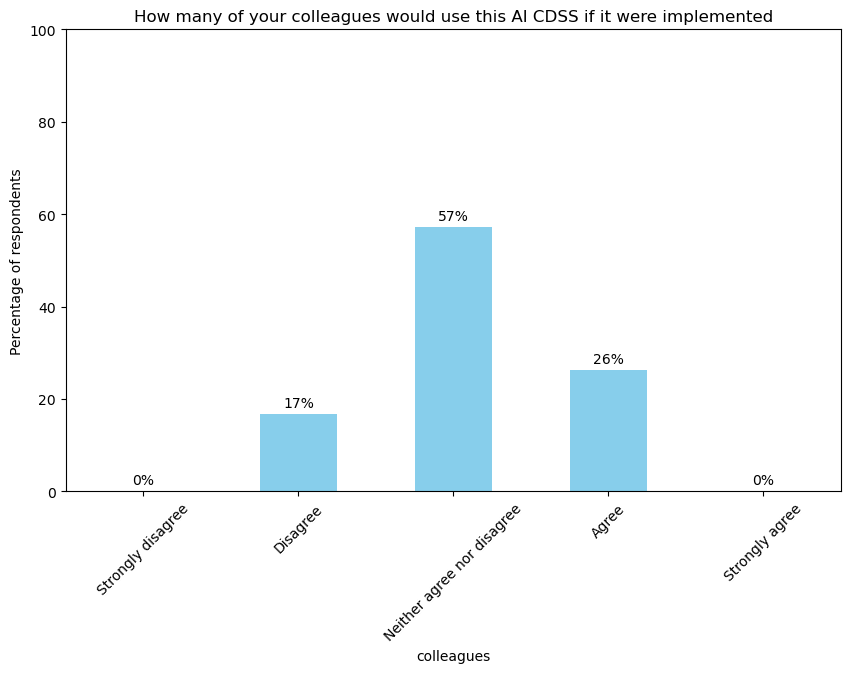

In [132]:
# prestige_image
updated_tam_df['colleagues'].mean()
updated_tam_df['colleagues'].std()
anover_kw_test(updated_tam_df, 'colleagues')
bar_plot(updated_tam_df, 'colleagues', 'How many of your colleagues would use this AI CDSS if it were implemented')

# Group plot

In [57]:
import textwrap

def multi_bar_plot(df, cat_cols, questions=None):
    # Define the mapping of numbers to labels
    labels = {1: 'Strongly disagree', 2: 'Disagree', 3: 'Neither agree nor disagree', 4: 'Agree', 5: 'Strongly agree'}

    # Create subplots with 3 rows and 2 columns
    fig, axs = plt.subplots(3, 2, figsize=(15, 15), sharey=True, sharex=True)
    axs = axs.flatten()

    for i, cat_col in enumerate(cat_cols):
        # Map the data to the labels
        data_labels = df[cat_col].map(labels)

        # Count the occurrences of each label and convert to percentages
        label_counts = data_labels.value_counts(normalize=True).reindex(labels.values(), fill_value=0) * 100

        # Plot the bar chart in the respective subplot
        bars = label_counts.plot(kind='bar', color='skyblue', ax=axs[i])
        axs[i].set_ylabel('Percentage of respondents')
        axs[i].set_ylim(0, 100)  # Set the y-axis limit to 0-100%
        axs[i].set_xticklabels(labels.values(), rotation=45, ha='right')

        # Remove the general x-axis label (but keep tick labels)
        axs[i].set_xlabel('')

        # Set the title with text wrapping if provided
        if questions is not None and len(questions) > i:
            wrapped_title = "\n".join(textwrap.wrap(questions[i], width=75))  # Increase width for wrapping
            axs[i].set_title(wrapped_title)
        else:
            axs[i].set_title(cat_col)

        # Annotate bars with percentage values
        for bar in bars.patches:
            height = bar.get_height()
            axs[i].annotate(f'{height:.0f}%',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords='offset points',
                            ha='center', va='bottom')

    # Remove any unused subplots if fewer than 6 columns are provided
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.25)
    plt.show()

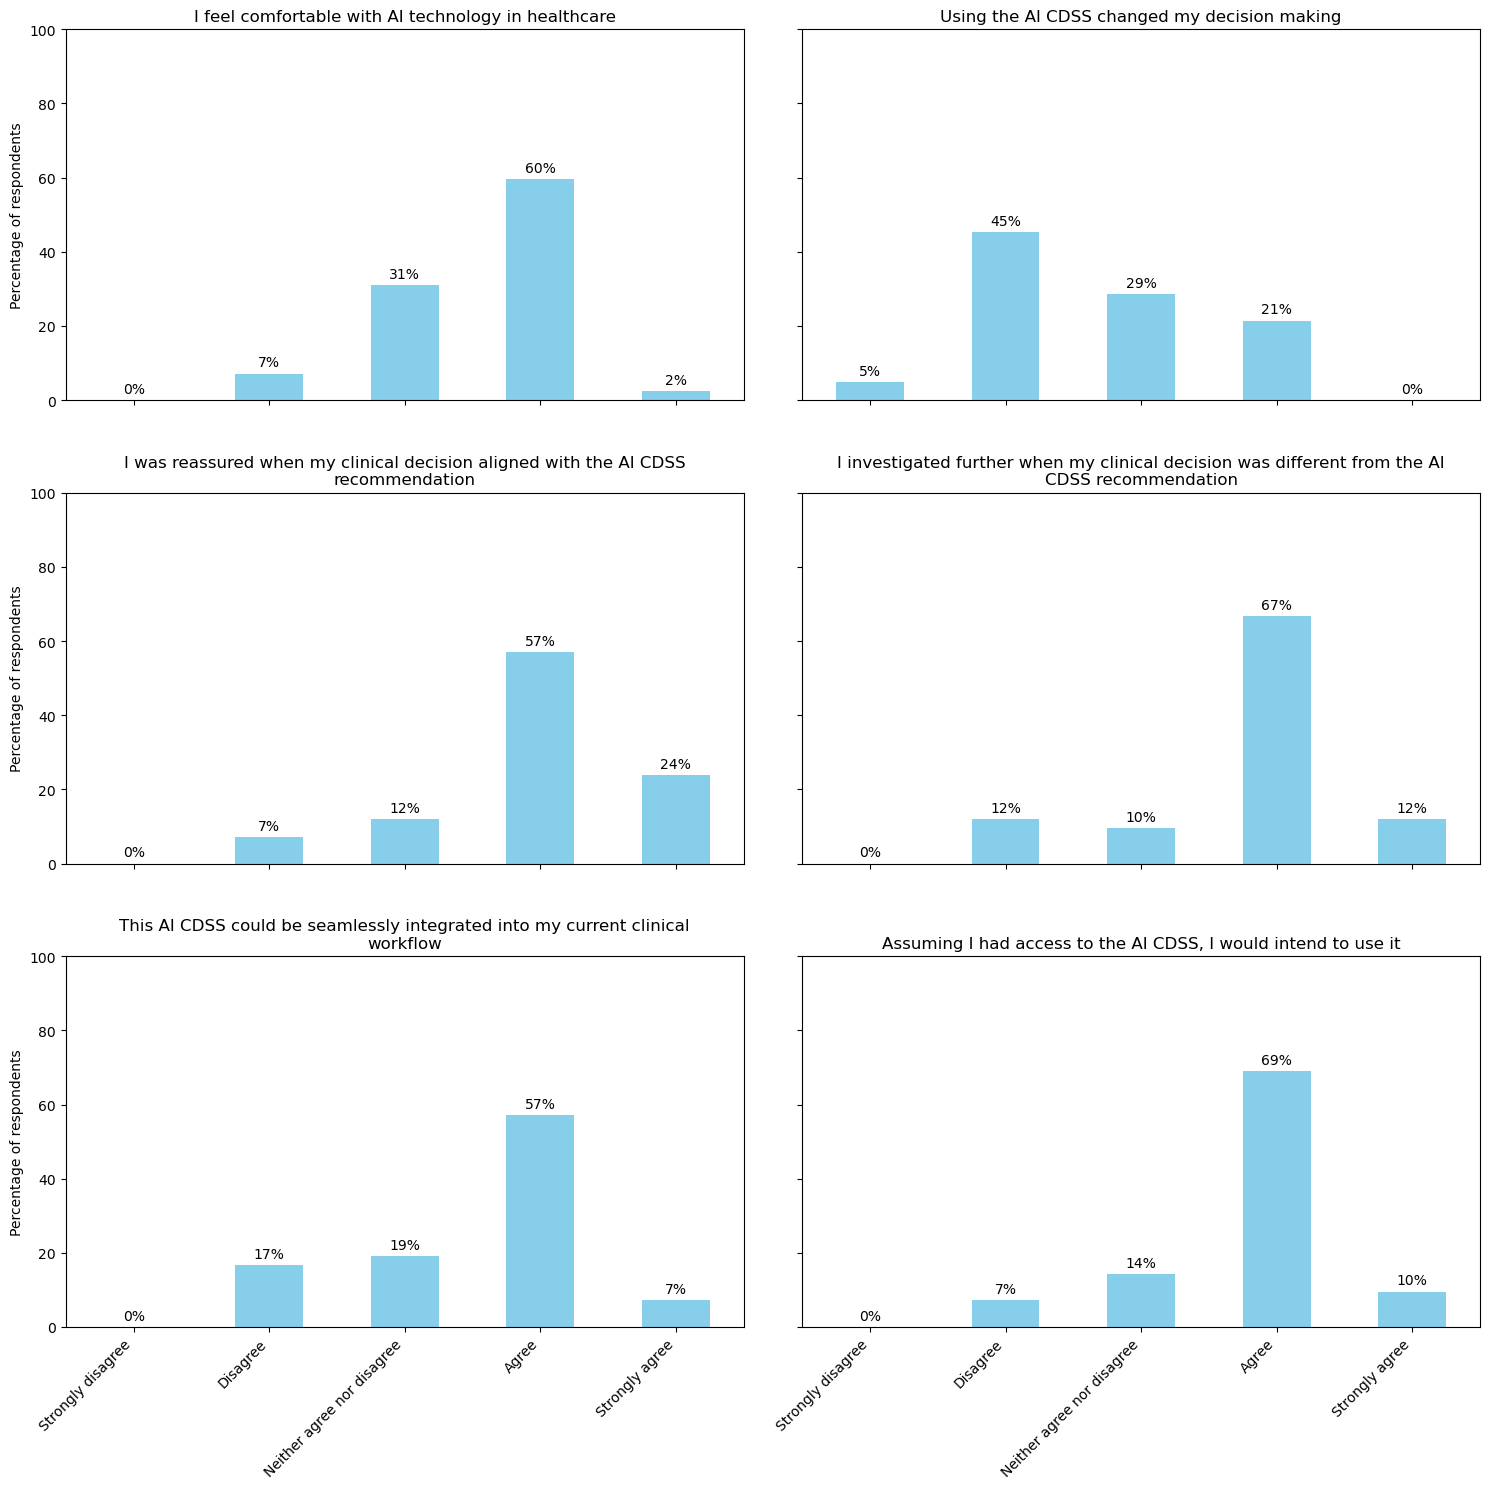

In [58]:
groups_to_plot = ['ai_attitude', 'BC1', 'BC2', 'BC3', 'clinical_workflow', 'intention']
questions = [
'I feel comfortable with AI technology in healthcare',
'Using the AI CDSS changed my decision making',
'I was reassured when my clinical decision aligned with the AI CDSS recommendation',
'I investigated further when my clinical decision was different from the AI CDSS recommendation',
'This AI CDSS could be seamlessly integrated into my current clinical workflow',
'Assuming I had access to the AI CDSS, I would intend to use it'
]

multi_bar_plot(updated_tam_df, groups_to_plot, questions)

In [106]:
def multi_bar_plot_difference(df, cat_cols, color_cols, questions=None):
    # Define the mapping of numbers to labels
    labels = {1: 'Strongly disagree', 2: 'Disagree', 3: 'Neither agree nor disagree', 4: 'Agree', 5: 'Strongly agree'}
    
    # Create subplots with 3 rows and 2 columns
    fig, axs = plt.subplots(3, 2, figsize=(15, 20), sharey=True)
    axs = axs.flatten()

    for idx, cat_col in enumerate(cat_cols):
        # Map the data to the labels
        df['label'] = df[cat_col].map(labels)
        
        # Calculate total counts for overall percentage annotation
        total_counts = df['label'].value_counts(normalize=True).reindex(labels.values(), fill_value=0) * 100
        
        # Initialize an empty DataFrame for stacking
        stacked_data = pd.DataFrame(index=labels.values())

        # Populate the stacked_data DataFrame
        col = color_cols[idx]
        for category in df[col].unique():
            subset = df[df[col] == category]
            label_counts = subset['label'].value_counts().reindex(labels.values(), fill_value=0)
            stacked_data[category] = label_counts

        # Convert the stacked data into percentages of the total rows
        stacked_data = (stacked_data / len(df)) * 100

        # Define colors for the bars
        colors = ['skyblue', 'cornflowerblue', 'lightcoral', 'olivedrab', 'slategrey']

        # Plot the stacked bar chart in the respective subplot
        bottom = None
        bar_width = 0.5  # Set the bar width to be narrower

        for i, category in enumerate(stacked_data.columns):
            bars = axs[idx].bar(stacked_data.index, stacked_data[category], bottom=bottom, 
                                color=colors[i % len(colors)], alpha=0.7, width=bar_width, label=category)
            bottom = stacked_data[category] if bottom is None else bottom + stacked_data[category]

        # Annotate bars with individual segment percentage values
        for i, bar in enumerate(axs[idx].patches):
            height = bar.get_height()
            if height > 0:  # Only annotate if there is a visible bar
                axs[idx].annotate(f'{height:.0f}%', 
                                  xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                                  xytext=(0, 0),  # Center the text on the bar
                                  textcoords='offset points',
                                  ha='center', va='center')

        # Annotate bars with overall percentage values
        overall_bars = axs[idx].bar(stacked_data.index, total_counts, width=bar_width, color='none', edgecolor='none')
        for bar in overall_bars:
            height = bar.get_height()
            if height > 0:  # Only annotate if there is a visible bar
                axs[idx].annotate(f'{height:.0f}%', 
                                  xy=(bar.get_x() + bar.get_width() / 2, height),
                                  xytext=(0, 3),  # 3 points vertical offset
                                  textcoords='offset points',
                                  ha='center', va='bottom')

        # Set title for each subplot
        if questions is not None and len(questions) > idx:
            wrapped_title = "\n".join(textwrap.wrap(questions[idx], width=75))
            axs[idx].set_title(wrapped_title)
        else:
            axs[idx].set_title(cat_col)

        # Ensure x-tick labels are set correctly only for the bottom subplots
        # We want to show x-tick labels only for the last row of subplots and the second-to-last subplot
        if idx in {3, 4}:  # 4th and 5th subplots (bottom row and second-to-last)
            axs[idx].set_xticks(range(len(labels.values())))
            axs[idx].set_xticklabels(labels.values(), rotation=45, ha='right')
        else:
            axs[idx].set_xticklabels([])  # Remove x-tick labels for other subplots

        axs[idx].set_ylim(0, 100)  # Set the y-axis limit to 0-100%

        # Remove the x-axis label (but keep tick labels)
        axs[idx].set_xlabel('')
        
        # Only set the y-axis label for the leftmost plots
        if idx % 2 == 0:
            axs[idx].set_ylabel('Percentage of respondents')

        # Add a legend to each subplot
        axs[idx].legend(title=col, loc='upper right')

    # Remove any unused subplots
    for j in range(idx + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)
    plt.show()

In [109]:
updated_tam_df.columns

Index(['user_id', 'user_archetype', 'ai_attitude', 'PU1', 'PU2', 'PU3', 'PU4',
       'PU5', 'PU6', 'PU7', 'PU8', 'PEOU1', 'PU9', 'PEOU2', 'SE1', 'SE2',
       'voluntary', 'SN1', 'SN2', 'prestige_image', 'PU10', 'PU11', 'BC1',
       'BC2', 'BC3', 'clinical_workflow', 'infrastructure', 'intention',
       'colleagues', 'PU12', 'final_comments', 'age_new', 'sex_new',
       'medical_speciality_new', 'grade_new', 'ai_familiarity_new', 'label'],
      dtype='object')

In [116]:
combined_se_df

,se_mean,user_archetype,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new,se_mean_round
0,4.5,a,30s,Male,Pharmacist,Other,Slightly familiar,5
1,4.5,b,30s,Male,Infectious Diseases,Other,Slightly familiar,5
2,4.5,a,30s,Male,Infectious Diseases,Other,Slightly familiar,5
3,4.0,b,30s,Female,Infectious Diseases,Other,Not familiar,4
4,3.5,a,30s,Male,Other,Consultant,Slightly familiar,4
5,4.0,b,40s,Male,Other,Consultant,Moderately familiar,4
6,4.0,a,40s,Male,Pharmacist,Consultant,Slightly familiar,4
7,3.5,b,30s,Female,Pharmacist,Other,Moderately familiar,4
8,4.0,a,30s,Female,Pharmacist,Other,Slightly familiar,4
9,4.0,b,40s,Male,Microbiology,Consultant,Slightly familiar,4


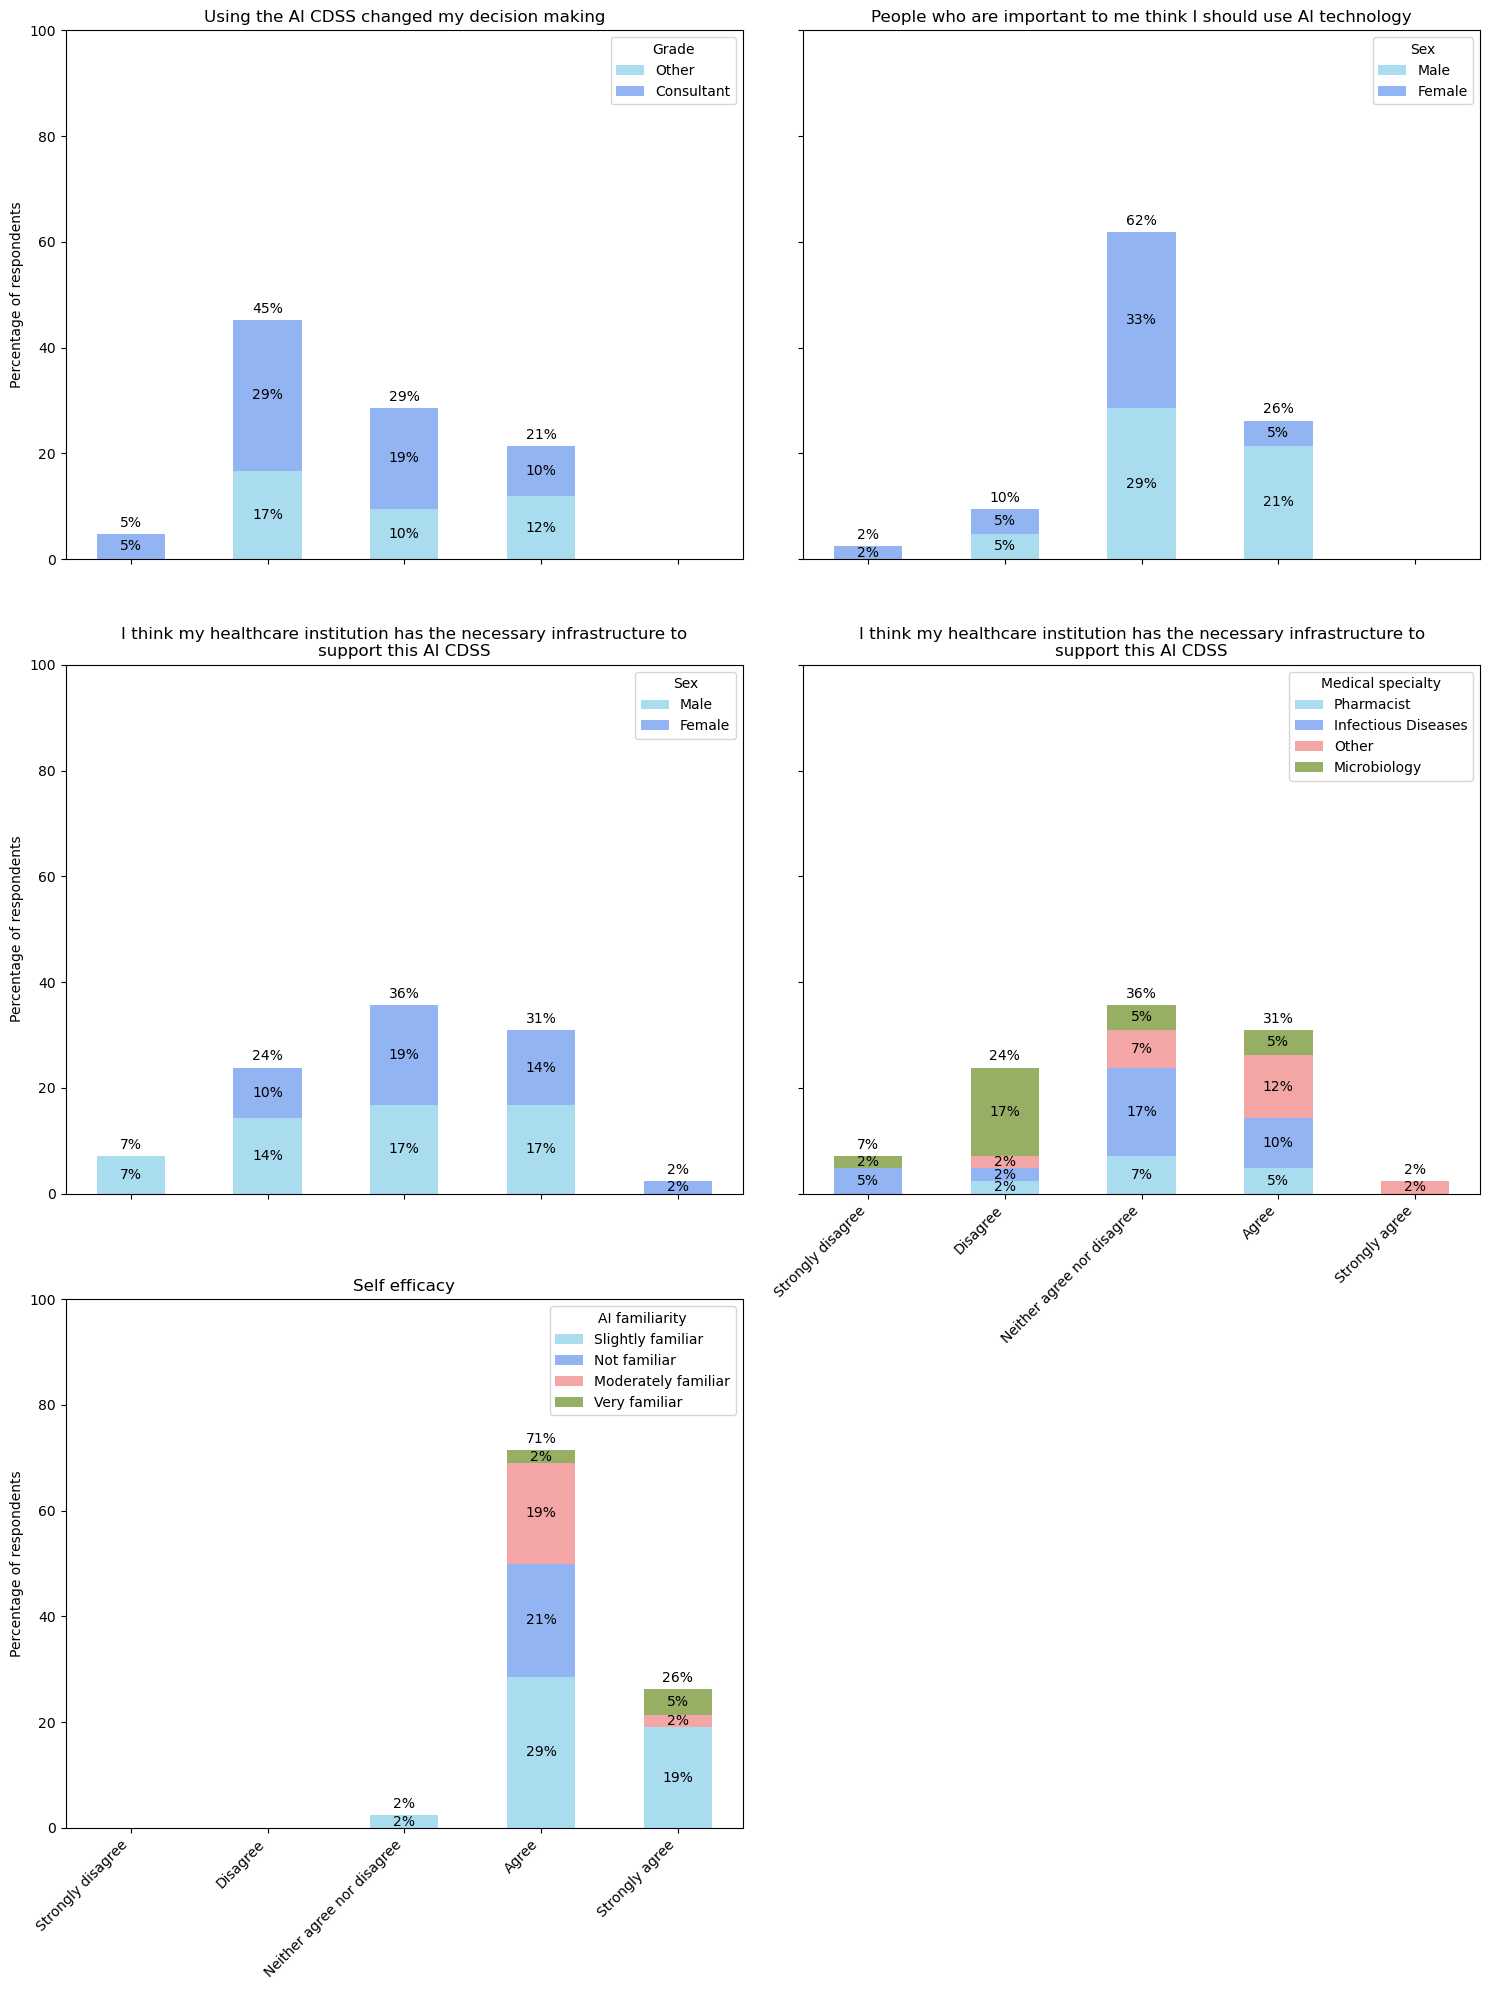

In [119]:
groups_to_plot = ['BC1', 'SN2', 'infrastructure', 'infrastructure', 'se_mean_round']
subgroup = ['Grade', 'Sex', 'Sex', 'Medical specialty', 'AI familiarity']
questions = [
'Using the AI CDSS changed my decision making',
'People who are important to me think I should use AI technology',
'I think my healthcare institution has the necessary infrastructure to support this AI CDSS',
'I think my healthcare institution has the necessary infrastructure to support this AI CDSS',
'Self efficacy'
]

plotting_df = updated_tam_df.rename(columns={'sex_new': 'Sex', 'medical_speciality_new': 'Medical specialty', 'grade_new': 'Grade', 'ai_familiarity_new': 'AI familiarity'})
plotting_df['se_mean_round'] = combined_se_df['se_mean_round']

multi_bar_plot_difference(plotting_df, groups_to_plot, subgroup, questions)

In [ ]:
combined_se_df, 'se_mean_round', 'ai_familiarity_new', 'SE'

# Old

In [47]:
mardia_test = pg.multivariate_normality(pu_df, alpha=0.05)
print(mardia_test)

HZResults(hz=0.9957092836013285, pval=0.029661972701394965, normal=False)


In [37]:
pg.box_m(data=pu_df.join(demographics[['age', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']]), dvs=['PU1', 'PU2', 'PU3', 'PU4', 'PU5', 'PU6', 'PU7', 'PU8', 'PU9', 'PU10', 'PU11', 'PU12'], group='age')
pg.box_m(data=pu_df.join(demographics[['age', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']]), dvs=['PU1', 'PU2', 'PU3', 'PU4', 'PU5', 'PU6', 'PU7', 'PU8', 'PU9', 'PU10', 'PU11', 'PU12'], group='sex_new')
pg.box_m(data=pu_df.join(demographics[['age', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']]), dvs=['PU1', 'PU2', 'PU3', 'PU4', 'PU5', 'PU6', 'PU7', 'PU8', 'PU9', 'PU10', 'PU11', 'PU12'], group='medical_speciality_new')
pg.box_m(data=pu_df.join(demographics[['age', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']]), dvs=['PU1', 'PU2', 'PU3', 'PU4', 'PU5', 'PU6', 'PU7', 'PU8', 'PU9', 'PU10', 'PU11', 'PU12'], group='grade_new')
pg.box_m(data=pu_df.join(demographics[['age', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']]), dvs=['PU1', 'PU2', 'PU3', 'PU4', 'PU5', 'PU6', 'PU7', 'PU8', 'PU9', 'PU10', 'PU11', 'PU12'], group='ai_familiarity_new')

/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/pandas/core/frame.py:10866: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/pingouin/multivariate.py:386: RuntimeWarning: divide by zero encountered in divide
  c *= (1 / v).sum() - 1 / v.sum()


,Chi2,df,pval,equal_cov
box,NaN,1638.0,NaN,False


,Chi2,df,pval,equal_cov
box,75.593733,78.0,0.556115,True


/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/pingouin/multivariate.py:375: RuntimeWarning: invalid value encountered in power
  M = ((np.linalg.det(covs) / S_det) ** (v / 2)).prod()


,Chi2,df,pval,equal_cov
box,NaN,234.0,NaN,False


/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/pingouin/multivariate.py:375: RuntimeWarning: invalid value encountered in power
  M = ((np.linalg.det(covs) / S_det) ** (v / 2)).prod()


,Chi2,df,pval,equal_cov
box,NaN,78.0,NaN,False


/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/pandas/core/frame.py:10866: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/wb1115/anaconda3/envs/cdss/lib/python3.10/site-packages/pingouin/multivariate.py:386: RuntimeWarning: divide by zero encountered in divide
  c *= (1 / v).sum() - 1 / v.sum()


,Chi2,df,pval,equal_cov
box,NaN,234.0,NaN,False


In [27]:
formula

'PU1+PU2+PU3+PU4+PU5+PU6+PU7+PU8+PU9+PU10+PU11+PU12 ~ age + sex_new + medical_speciality_new + grade_new + ai_familiarity_new'

In [26]:
# Prepare the formula for MANOVA
# Include all questionnaire items in the dependent variables section
dependent_vars = '+'.join([f'{i}' for i in pu_df.columns])
formula = f'{dependent_vars} ~ age + sex_new + medical_speciality_new + grade_new + ai_familiarity_new'

manova = MANOVA.from_formula(formula, data=pu_df.join(demographics[['age', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']]))
result = manova.mv_test()

In [29]:
print(result)


                  Multivariate linear model
                                                              
--------------------------------------------------------------
         Intercept        Value   Num DF Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.1534 12.0000 5.0000  2.2992 0.1841
           Pillai's trace 0.8466 12.0000 5.0000  2.2992 0.1841
   Hotelling-Lawley trace 5.5182 12.0000 5.0000  2.2992 0.1841
      Roy's greatest root 5.5182 12.0000 5.0000  2.2992 0.1841
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          sex_new         Value   Num DF Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.2781 12.0000 5.0000  1.0816 0.5018
           Pillai's trace 0.7219 12.0000 5.0000  1.0816 0.5018
   Hotellin

In [38]:
# Prepare the formula for MANOVA
# Include all questionnaire items in the dependent variables section
dependent_vars = '+'.join([f'{i}' for i in pu_df.columns])
formula = f'{dependent_vars} ~ age + sex_new + medical_speciality_new + grade_new + ai_familiarity_new'

manova = MANOVA.from_formula(formula, data=pu_df.rank().join(demographics[['age', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']]))
result = manova.mv_test()

In [39]:
print(result)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
         Intercept        Value   Num DF Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.2193 12.0000 5.0000  1.4837 0.3489
           Pillai's trace 0.7807 12.0000 5.0000  1.4837 0.3489
   Hotelling-Lawley trace 3.5609 12.0000 5.0000  1.4837 0.3489
      Roy's greatest root 3.5609 12.0000 5.0000  1.4837 0.3489
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          sex_new         Value   Num DF Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.4661 12.0000 5.0000  0.4774 0.8635
           Pillai's trace 0.5339 12.0000 5.0000  0.4774 0.8635
   Hotellin